# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [135]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    a_hat = 0
    d = X_train.shape[1]
    n = len(Y_train)
    pos = 0
    for i in range(n):
        if Y_train[i] > 0:
            pos += 1
    a_hat = pos / n
    mu_pos, mu_neg = np.zeros(d), np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1:
            mu_pos = np.add(mu_pos, X_train[i])
            
        else:
            mu_neg = np.add(mu_neg, X_train[i])
    mu_pos /= pos
    mu_neg /= (n - pos)
    def nta(x):
        num = 1
        den = 1 + np.exp((1/2) * (np.linalg.norm(mu_pos)**2 - np.linalg.norm(mu_neg)**2)) * np.exp(x.T @ np.subtract(mu_neg,mu_pos))
        return (num) / den
    m = X_test.shape[0]
    preds = np.zeros(m)
    for i in range(m):
        x = X_test[i]
        if 2 * nta(x) > 1:
            preds[i] = 1
        else:
            preds[i] = -1
    return preds
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    def expo(x, mu, cov):
        ans = np.exp((-1/2) * (np.subtract(x, mu).T @ np.linalg.inv(cov) @ np.subtract(x, mu)))
        return ans
    n, d = X_train.shape[0], X_train.shape[1]
    pos = 0
    cov = np.zeros((d,d))
    for i in range(n):
        if Y_train[i] > 0:
            pos += 1
    a_hat = pos / n
    mu_pos, mu_neg = np.zeros(d), np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1:
            mu_pos = np.add(mu_pos, X_train[i])
        else:
            mu_neg = np.add(mu_neg, X_train[i])
    mu_pos /= pos
    mu_neg /= (n - pos)
    for i in range(d):
        for j in range(d):
            s = 0
            for k in range(n):
                s += (X_train[k][i] - mu_pos[i]) * (X_train[k][j] - mu_pos[j])
            s /= n
            cov[i][j] = s
    def nta(x):
        num = expo(x, mu_pos, cov)
        den = expo(x, mu_pos, cov) + expo(x, mu_neg, cov)
        return num / den
    m = X_test.shape[0]
    preds = np.zeros(m)
    for i in range(m):
        x = X_test[i]
        if 2 * nta(x) > 1:
            preds[i] = 1
        else:
            preds[i] = -1
    return preds
def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    def expo(x, mu, cov):
        ans = np.exp((-1/2) * (np.subtract(x, mu).T @ np.linalg.inv(cov) @ np.subtract(x, mu)))
        return ans
    n, d = X_train.shape[0], X_train.shape[1]
    pos = 0
    cov_pos, cov_neg = np.zeros((d,d)), np.zeros((d,d))
    for i in range(n):
        if Y_train[i] > 0:
            pos += 1
    a_hat = pos / n
    mu_pos, mu_neg = np.zeros(d), np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1:
            mu_pos = np.add(mu_pos, X_train[i])
        else:
            mu_neg = np.add(mu_neg, X_train[i])
    mu_pos /= pos
    mu_neg /= (n - pos)
#     print(mu_pos)
#     print(mu_neg)
    for i in range(d):
        for j in range(d):
            s_pos, s_neg = 0, 0
            for k in range(n):
                if Y_train[k] > 0:
                    s_pos += (X_train[k][i] - mu_pos[i]) * (X_train[k][j] - mu_pos[j])
                else:
                    s_neg += (X_train[k][i] - mu_neg[i]) * (X_train[k][j] - mu_neg[j])
            s_pos /= pos
            cov_pos[i][j] = s_pos
            s_neg /= (n - pos)
            cov_neg[i][j] = s_neg
#     print(cov_pos)
#     print(cov_neg)
    def nta(x):
        num = expo(x, mu_pos, cov_pos)
        den = expo(x, mu_pos, cov_pos) + expo(x, mu_neg, cov_neg)
        return num / den
    m = X_test.shape[0]
    preds = np.zeros(m)
    for i in range(m):
        x = X_test[i]
        if 2 * nta(x) > 1:
            preds[i] = 1
        else:
            preds[i] = -1
    return preds
    
    




In [137]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

# Y_pred_test_1a = Bayes1c(X_train, Y_train, X_test)
# Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

def check(y):
    pos, neg = 0, 0
    for i in range(len(y)):
        if y[i] > 0:
            pos += 1
        else:
            neg += 1
    return pos, neg
# print(check(Y_pred_test_1c))

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


Text(0.5, 1.0, 'Dataset_3 Bayes c')

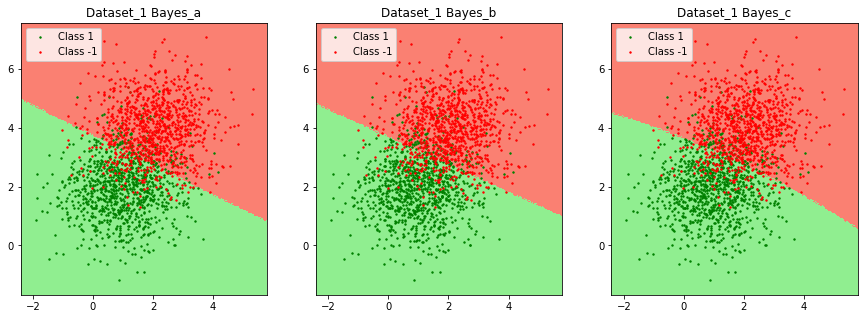

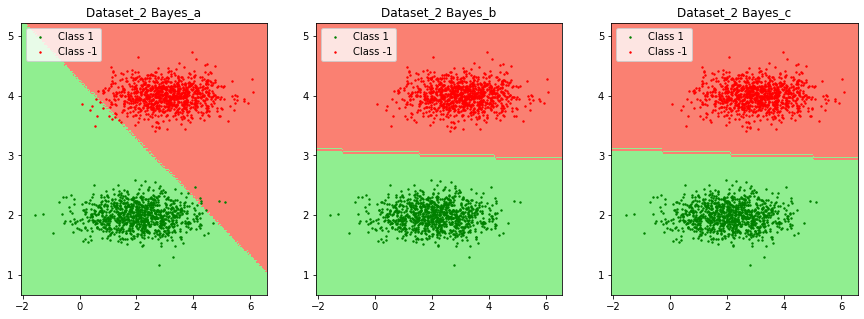

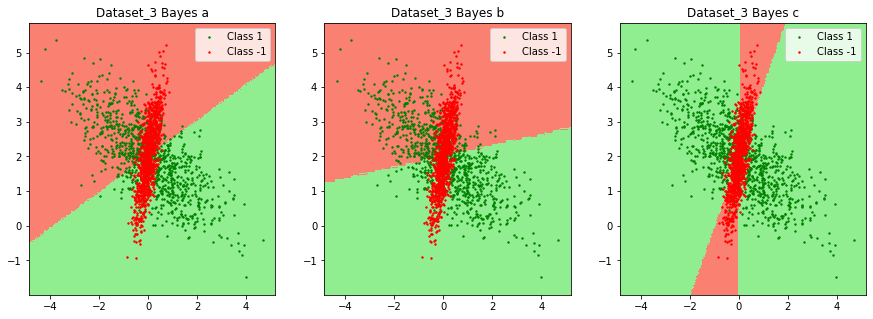

In [133]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
error_mat = [[0 for i in range(3)] for y in range(3)]


# train1 = np.load('Archive/dataset1_1.npz')

#  CHANGING PATH OF DATA FOLDER
train1 = np.load('../../Data/dataset1_1.npz')

X_train, Y_train = train1['arr_0'], train1['arr_1']
X_test1, Y_test1 = train1['arr_2'], train1['arr_3']

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
preds1a = Bayes1a(X_train, Y_train, X_test)
preds1b = Bayes1b(X_train, Y_train, X_test)
preds1c = Bayes1c(X_train, Y_train, X_test)
error_mat[0][0] = sum(np.equal(preds1a,Y_test)) / len(Y_test)
error_mat[0][1] = sum(np.equal(preds1b,Y_test)) / len(Y_test)
error_mat[0][2] = sum(np.equal(preds1c,Y_test)) / len(Y_test)

x, y = [],[]
for i in range(2000):
    x.append(X_train[i][0])
    y.append(X_train[i][1])

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.05), np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples = np.concatenate([X.reshape(-1,1), Y.reshape(-1,1)], axis=1)

Za = Bayes1a(X_train, Y_train, test_samples)
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['salmon','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2, c='green',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='r',label='Class -1')
ax1.legend()
ax1.set_title("Dataset_1 Bayes_a")

Zb = Bayes1b(X_train, Y_train, test_samples)
ax2.contourf(X,Y,Zb.reshape(X.shape), colors=['salmon','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2, c='green',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1],s=2, c='r',label='Class -1')
ax2.legend()
ax2.set_title("Dataset_1 Bayes_b")

Zc = Bayes1c(X_train, Y_train, test_samples)
ax3.contourf(X,Y,Zc.reshape(X.shape), colors=['salmon','lightgreen'])
ax3.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2, c='green',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1],s=2, c='r',label='Class -1')
ax3.legend()
ax3.set_title("Dataset_1 Bayes_c")

# train2 = np.load('Archive/dataset1_2.npz')

# CHANGE PATH OF DATA FOLDER
train2 = np.load('../../Data/dataset1_2.npz')

X_train2, Y_train2 = train2['arr_0'], train2['arr_1']
X_test2, Y_test2 = train2['arr_2'], train2['arr_3']

fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
preds2a = Bayes1a(X_train2, Y_train2, X_test2)
preds2b = Bayes1b(X_train2, Y_train2, X_test2)
preds2c = Bayes1c(X_train2, Y_train2, X_test2)
error_mat[1][0] = sum(np.equal(preds2a,Y_test2)) / len(Y_test2)
error_mat[1][1] = sum(np.equal(preds2b,Y_test2)) / len(Y_test2)
error_mat[1][2] = sum(np.equal(preds2c,Y_test2)) / len(Y_test2)

x, y = [],[]
for i in range(2000):
    x.append(X_train2[i][0])
    y.append(X_train2[i][1])

X_min2 = min(X_train2[:,0]),min(X_train2[:,1])
X_max2 = max(X_train2[:,0]),max(X_train2[:,1])
X2,Y2 = np.meshgrid(np.arange(X_min2[0]-0.5, X_max2[0]+0.5, 0.05), np.arange(X_min2[1]-0.5,X_max2[1]+0.5,0.05))
test_samples2 = np.concatenate([X2.reshape(-1,1), Y2.reshape(-1,1)], axis=1)

Z2a = Bayes1a(X_train2, Y_train2, test_samples2)
ax4.contourf(X2,Y2,Z2a.reshape(X2.shape),colors=['salmon','lightgreen'])
ax4.scatter(X_train2[Y_train2==1][:,0], X_train2[Y_train2==1][:,1], s=2, c='green',label='Class 1')
ax4.scatter(X_train2[Y_train2==-1][:,0], X_train2[Y_train2==-1][:,1], s=2, c='r',label='Class -1')
ax4.legend()
ax4.set_title("Dataset_2 Bayes_a")

Z2b = Bayes1b(X_train2, Y_train2, test_samples2)
ax5.contourf(X2,Y2,Z2b.reshape(X2.shape), colors=['salmon','lightgreen'])
ax5.scatter(X_train2[Y_train2==1][:,0], X_train2[Y_train2==1][:,1], s=2, c='green',label='Class 1')
ax5.scatter(X_train2[Y_train2==-1][:,0], X_train2[Y_train2==-1][:,1],s=2, c='r',label='Class -1')
ax5.legend()
ax5.set_title("Dataset_2 Bayes_b")


Z2c = Bayes1c(X_train2, Y_train2, test_samples2)
ax6.contourf(X2,Y2,Z2c.reshape(X2.shape), colors=['salmon','lightgreen'])
ax6.scatter(X_train2[Y_train2==1][:,0], X_train2[Y_train2==1][:,1], s=2, c='green',label='Class 1')
ax6.scatter(X_train2[Y_train2==-1][:,0], X_train2[Y_train2==-1][:,1],s=2, c='r',label='Class -1')
ax6.legend()
ax6.set_title("Dataset_2 Bayes_c")


# train3 = np.load('Archive/dataset1_3.npz')

# CHANGE PATH OF DATA FOLDER
train3 = np.load('../../Data/dataset1_3.npz')

X_train3, Y_train3 = train3['arr_0'], train3['arr_1']
X_test3, Y_test3 = train3['arr_2'], train3['arr_3']

fig3, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
preds3a = Bayes1a(X_train3, Y_train3, X_test3)
preds3b = Bayes1b(X_train3, Y_train3, X_test3)
preds3c = Bayes1c(X_train3, Y_train3, X_test3)
error_mat[2][0] = sum(np.equal(preds3a,Y_test3)) / len(Y_test3)
error_mat[2][1] = sum(np.equal(preds3b,Y_test3)) / len(Y_test3)
error_mat[2][2] = sum(np.equal(preds3c,Y_test3)) / len(Y_test3)

x, y = [],[]
for i in range(2000):
    x.append(X_train3[i][0])
    y.append(X_train3[i][1])

X_min3 = min(X_train3[:,0]),min(X_train3[:,1])
X_max3 = max(X_train3[:,0]),max(X_train3[:,1])
X3,Y3 = np.meshgrid(np.arange(X_min3[0]-0.5, X_max3[0]+0.5, 0.05), np.arange(X_min3[1]-0.5,X_max3[1]+0.5,0.05))
test_samples3 = np.concatenate([X3.reshape(-1,1), Y3.reshape(-1,1)], axis=1)

Z3a = Bayes1a(X_train3, Y_train3, test_samples3)
ax7.contourf(X3,Y3,Z3a.reshape(X3.shape),colors=['salmon','lightgreen'])
ax7.scatter(X_train3[Y_train3==1][:,0], X_train3[Y_train3==1][:,1], s=2, c='green',label='Class 1')
ax7.scatter(X_train3[Y_train3==-1][:,0], X_train3[Y_train3==-1][:,1], s=2, c='r',label='Class -1')
ax7.legend()
ax7.set_title("Dataset_3 Bayes a")

Z3b = Bayes1b(X_train3, Y_train3, test_samples3)
ax8.contourf(X3,Y3,Z3b.reshape(X3.shape), colors=['salmon','lightgreen'])
ax8.scatter(X_train3[Y_train3==1][:,0], X_train3[Y_train3==1][:,1], s=2, c='green',label='Class 1')
ax8.scatter(X_train3[Y_train3==-1][:,0], X_train3[Y_train3==-1][:,1],s=2, c='r',label='Class -1')
ax8.legend()
ax8.set_title("Dataset_3 Bayes b")

Z3c = Bayes1c(X_train3, Y_train3, test_samples3)
ax9.contourf(X3,Y3,Z3c.reshape(X3.shape), colors=['salmon','lightgreen'])
ax9.scatter(X_train3[Y_train3==1][:,0], X_train3[Y_train3==1][:,1], s=2, c='green',label='Class 1')
ax9.scatter(X_train3[Y_train3==-1][:,0], X_train3[Y_train3==-1][:,1],s=2, c='r',label='Class -1')
ax9.legend()
ax9.set_title("Dataset_3 Bayes c")

# for i in range(3):
#     print("="*70)
#     print("Dataset 1 : ",end = ' ')
#     print(*error_mat[i])
#     print('\n')

** Cell type : TextWrite ** 
(Write your observations and table of errors here) <br>

<table style="width:100%">
<tr>
    <th>DataSets</th>
<th>Bayes a</th>
<th>Bayes b</th>
<th>Bayes c</th>
</tr>

<tr>
    <td>DataSet 1</td>
    <td>0.1345</td>
    <td>0.135</td>
    <td>0.135</td>
</tr>
 <tr>
    <td>DataSet 2</td>
    <td>0.0085</td>
    <td>0.0</td>
    <td>0.0</td>
    </tr>
<tr>
    <td>DataSet 3</td>
    <td>0.497</td>
    <td>0.495</td>
    <td>0.234</td>
</tr>
</table>

# Observations 

1) For DataSet 1 the assumption that the covariance matrix is the Identity Matrix is valid. The Bayesa Classifier has the same error % as the Bayesb and Bayesc classifiers which assume different covariance matrices. <br>
2) For DataSet2 the assumption that both the classes have same covariance matrix, but not neccessarily the Identity Matrix is correct, as we can see from the Error Rates that the Bayesa classifier has some Error, but the Bayesb and Bayesc Classifiers don't have any Errors.<br>
3) For DataSet3 the third assumption is correct,  which says that the 2 classes have different covariance matrices. For the Third Case Bayesc gives the least error while both Bayesa and Bayesb give about 50% error. <br>
4) We can see that the Bayes c classifier can handle data with different covariance, so the decision boundary for that clalssifier can be non-linear.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [2]:
# Cell type : CodeWrite
# Fill in functions in this cell

L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
def expo(x, mu, cov):
        ans = np.exp((-1/2) * (np.subtract(x, mu).T @ np.linalg.inv(cov) @ np.subtract(x, mu)))
        return ans
def eta(x, mu, cnt, cov):
    arr = [0 for x in range(4)]
    den = 0
    for i in range(4):
        den += expo(x, mu[i+1], cov) * (cnt[i+1] / sum(cnt))
    for i in range(4):
        num = expo(x, mu[i+1], cov) * (cnt[i+1] / sum(cnt))
        arr[i] = num / den
    return np.array(arr)
def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n, d = X_train.shape[0], X_train.shape[1]
    m = X_test.shape[0]
    cov = np.identity(d)
    mu = [np.zeros(d) for i in range(5)]
    cnt = [0 for i in range(5)]
    for i in range(n):
        label = int(Y_train[i])
#         print(label,'label')
        for j in range(d):
            mu[label][j] += X_train[i][j]
        cnt[label] += 1
    for i in range(1, 5):
        for j in range(d):
            mu[i][j] /= cnt[i]
#     print(mu)
#     print(cnt)
    preds = np.array([0 for i in range(m)])
    for i in range(m):
        x = X_test[i]
        etaa = eta(x, mu, cnt, cov)
#         print(etaa,'etaa')
        labels = [0 for k in range(4)]
        for j in range(4):
            loss = L[:,j]
            z = etaa.T @ loss
#             print(z)
            labels[j] = z
#             print(labels, etaa.T @ loss, j, labels[j], loss)
#         print(labels, 'labels',np.argmin(labels), etaa.T @ loss)
#         break
        preds[i] = np.argmin(labels)+1
    return preds
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n, d = X_train.shape[0], X_train.shape[1]
    m = X_test.shape[0]
    cov = np.zeros((d,d))
    mu = [np.zeros(d) for i in range(5)]
    cnt = [0 for i in range(5)]
    for i in range(n):
        label = int(Y_train[i])
#         print(label,'label')
        for j in range(d):
            mu[label][j] += X_train[i][j]
        cnt[label] += 1
    for i in range(1, 5):
        for j in range(d):
            mu[i][j] /= cnt[i]
#     print(mu)
#     print(cnt)
#     print(cov)
    for i in range(d):
        for j in range(d):
            s = 0
            for k in range(n):
                if Y_train[k] == 1:
                    s += (X_train[k][i] - mu[1][i])*(X_train[k][j] - mu[1][j])
#             print(s)
            s /= cnt[1]
            cov[i][j] = s
#     print(cov)
    preds = np.array([0 for i in range(m)])
    for i in range(m):
        x = X_test[i]
        etaa = eta(x, mu, cnt, cov)
#         print(etaa,'etaa')
        labels = [0 for k in range(4)]
        for j in range(4):
            loss = L[:,j]
            z = etaa.T @ loss
#             print(z)
            labels[j] = z
#             print(labels, etaa.T @ loss, j, labels[j], loss)
#         print(labels, 'labels',np.argmin(labels), etaa.T @ loss)
#         break
        preds[i] = np.argmin(labels)+1
    return preds
def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

    n, d = X_train.shape[0], X_train.shape[1]
    m = X_test.shape[0]
    cov = [np.zeros((d,d)) for i in range(4)]
    mu = [np.zeros(d) for i in range(5)]
    cnt = [0 for i in range(5)]
    for i in range(n):
        label = int(Y_train[i])
#         print(label,'label')
        for j in range(d):
            mu[label][j] += X_train[i][j]
        cnt[label] += 1
    for i in range(1, 5):
        for j in range(d):
            mu[i][j] /= cnt[i]
#     print(mu)
#     print(cnt)
#     print(cov)
    for i in range(d):
        for j in range(d):
            s = [0, 0, 0, 0]
            for k in range(n):
                Y_train[k] = int(Y_train[k])
                s[int(Y_train[k]) - 1] += (X_train[k][i] - mu[int(Y_train[k])][i])*(X_train[k][j] - mu[int(Y_train[k])][j])
#             print(s)
#             s /= cnt[1]
            for k in range(4):
                s[k] /= cnt[k+1]
                cov[k][i][j] = s[k]
#     print(cov)
    preds = np.array([0 for i in range(m)])
    for i in range(m):
        x = X_test[i]
        
#         print(etaa,'etaa')
        labels = [0 for k in range(4)]
        for j in range(4):
            loss = L[:,j]
            etaa = eta(x, mu, cnt, cov[j])
            z = etaa.T @ loss
#             print(z)
            labels[j] = z
#             print(labels, etaa.T @ loss, j, labels[j], loss)
#         print(labels, 'labels',np.argmin(labels), etaa.T @ loss)
#         break
        preds[i] = np.argmin(labels)+1
    return preds
    


    


In [3]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



# Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
# Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
def check(arr):
    cnt = [0 for x in range(4)]
    for i in arr:
        cnt[int(i)-1] += 1
    print(cnt)
# check(Y_pred_test_2c)

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


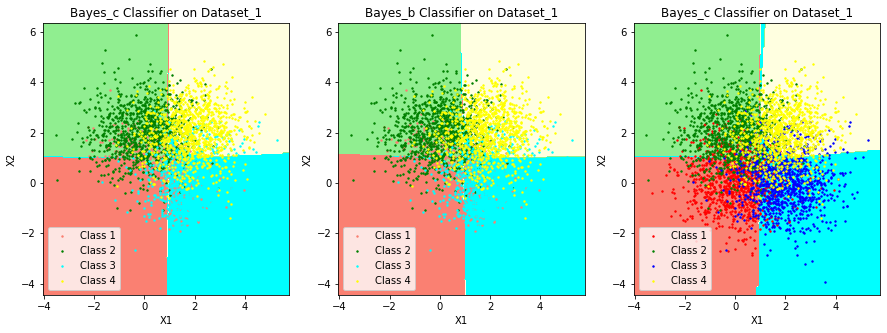

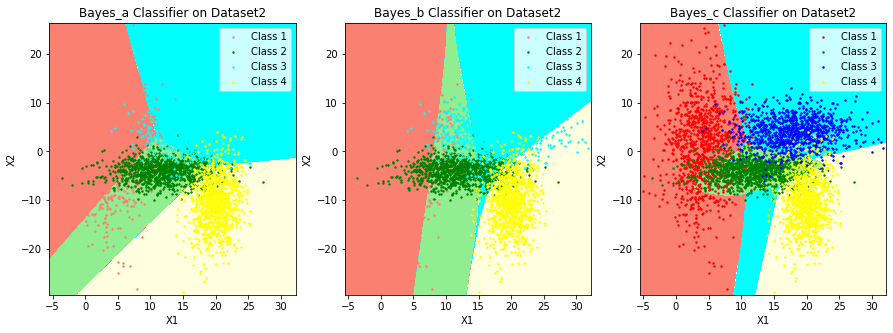

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# THE PLOT FOR DATASET 2 IS TAKING A LOT OF TIME TO RUN ABOUT 10 MINS. THE PLOTS ON DATASET 1\
# ARE FAST.

# train2 = np.load('Archive/dataset2_1.npz')

# CHANGE PATH OF DATA FOLDER

train2 = np.load('../../Data/dataset2_1.npz')


error_mat = [[0 for x in range(3)] for y in range(3)]
X_train1, Y_train1, X_test1, Y_test1 = train2['arr_0'], train2['arr_1'], train2['arr_2'], train2['arr_3']
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
preds2a = Bayes2a(X_train1, Y_train1, X_test1)
preds2b = Bayes2b(X_train1, Y_train1, X_test1)
preds2c = Bayes2c(X_train1, Y_train1, X_test1)
error_mat[0][0] = sum(np.equal(preds2a,Y_test1)) / len(Y_test1)
error_mat[0][1] = sum(np.equal(preds2b,Y_test1)) / len(Y_test1)
error_mat[0][2] = sum(np.equal(preds2c,Y_test1)) / len(Y_test1)

# x, y = [],[]
# for i in range(4000):
#     x.append(X_train1[i][0])
#     y.append(X_train1[i][1])

X_min = min(X_train1[:,0]),min(X_train1[:,1])
X_max = max(X_train1[:,0]),max(X_train1[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.05), np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples = np.concatenate([X.reshape(-1,1), Y.reshape(-1,1)], axis=1)

Za = Bayes2a(X_train1, Y_train1, test_samples)
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['salmon','aqua','lightgreen','lightyellow'])
ax1.scatter(X_train1[Y_train1==1][:,0], X_train1[Y_train1==1][:,1],s=2, c='salmon',label='Class 1')
ax1.scatter(X_train1[Y_train1==2][:,0], X_train1[Y_train1==2][:,1], s=2, c='green',label='Class 2')
ax1.scatter(X_train1[Y_train1==3][:,0], X_train1[Y_train1==3][:,1], s=2, c='aqua',label='Class 3')
ax1.scatter(X_train1[Y_train1==4][:,0], X_train1[Y_train1==4][:,1],  s=2, c='yellow',label='Class 4')
ax1.legend()
ax1.set_title("Bayes_c Classifier on Dataset_1")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

Zb = Bayes2b(X_train1, Y_train1, test_samples)
ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['salmon','aqua','lightgreen','lightyellow'])
ax2.scatter(X_train1[Y_train1==1][:,0], X_train1[Y_train1==1][:,1],s=2, c='salmon',label='Class 1')
ax2.scatter(X_train1[Y_train1==2][:,0], X_train1[Y_train1==2][:,1], s=2, c='green',label='Class 2')
ax2.scatter(X_train1[Y_train1==3][:,0], X_train1[Y_train1==3][:,1], s=2, c='aqua',label='Class 3')
ax2.scatter(X_train1[Y_train1==4][:,0], X_train1[Y_train1==4][:,1],  s=2, c='yellow',label='Class 4')
ax2.legend()
ax2.set_title("Bayes_b Classifier on Dataset_1")
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")

Zc = Bayes2c(X_train1, Y_train1, test_samples)
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['salmon','aqua','lightgreen','lightyellow'])
ax3.scatter(X_train1[Y_train1==1][:,0], X_train1[Y_train1==1][:,1],s=2, c='red',label='Class 1')
ax3.scatter(X_train1[Y_train1==2][:,0], X_train1[Y_train1==2][:,1], s=2, c='green',label='Class 2')
ax3.scatter(X_train1[Y_train1==3][:,0], X_train1[Y_train1==3][:,1], s=2, c='blue',label='Class 3')
ax3.scatter(X_train1[Y_train1==4][:,0], X_train1[Y_train1==4][:,1],  s=2, c='yellow',label='Class 4')
ax3.legend()
ax3.set_title("Bayes_c Classifier on Dataset_1")
ax3.set_xlabel("X1")
ax3.set_ylabel("X2")

plt.show()


# train22 = np.load('Archive/dataset2_2.npz')
#CHANGE OF DATA FOLDER

train2 = np.load('../../Data/dataset2_2.npz')

error_mat = [[0 for x in range(3)] for y in range(3)]
X_train2, Y_train2, X_test2, Y_test2 = train22['arr_0'], train22['arr_1'], train22['arr_2'], train22['arr_3']
fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)
preds2a = Bayes2a(X_train2, Y_train2, X_test2)
preds2b = Bayes2b(X_train2, Y_train2, X_test2)
preds2c = Bayes2c(X_train2, Y_train2, X_test2)
error_mat[0][0] = sum(np.equal(preds2a,Y_test2)) / len(Y_test2)
error_mat[0][1] = sum(np.equal(preds2b,Y_test2)) / len(Y_test2)
error_mat[0][2] = sum(np.equal(preds2c,Y_test2)) / len(Y_test2)

# x, y = [],[]
# for i in range(4000):
#     x.append(X_train2[i][0])
#     y.append(X_train2[i][1])

X_min = min(X_train2[:,0]),min(X_train2[:,1])
X_max = max(X_train2[:,0]),max(X_train2[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.05), np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples = np.concatenate([X.reshape(-1,1), Y.reshape(-1,1)], axis=1)

Za = Bayes2a(X_train2, Y_train2, test_samples)
ax4.contourf(X,Y,Za.reshape(X.shape),colors=['salmon','aqua','lightgreen','lightyellow'])
ax4.scatter(X_train2[Y_train2==1][:,0], X_train2[Y_train2==1][:,1],s=2, c='salmon',label='Class 1')
ax4.scatter(X_train2[Y_train2==2][:,0], X_train2[Y_train2==2][:,1],s=2, c='green',label='Class 2')
ax4.scatter(X_train2[Y_train2==3][:,0], X_train2[Y_train2==3][:,1],s=2, c='aqua',label='Class 3')
ax4.scatter(X_train2[Y_train2==4][:,0], X_train2[Y_train2==4][:,1],s=2,c='yellow',label='Class 4')
ax4.legend()
ax4.set_title("Bayes_a Classifier on Dataset2")
ax4.set_xlabel("X1")
ax4.set_ylabel("X2")

Zb = Bayes2b(X_train2, Y_train2, test_samples)
ax5.contourf(X,Y,Zb.reshape(X.shape),colors=['salmon','aqua','lightgreen','lightyellow'])
ax5.scatter(X_train2[Y_train2==1][:,0], X_train2[Y_train2==1][:,1],s=2, c='salmon',label='Class 1')
ax5.scatter(X_train2[Y_train2==2][:,0], X_train2[Y_train2==2][:,1],s=2, c='green',label='Class 2')
ax5.scatter(X_train2[Y_train2==3][:,0], X_train2[Y_train2==3][:,1],s=2, c='aqua',label='Class 3')
ax5.scatter(X_train2[Y_train2==4][:,0], X_train2[Y_train2==4][:,1],s=2, c='yellow',label='Class 4')
ax5.legend()
ax5.set_title("Bayes_b Classifier on Dataset2")
ax5.set_xlabel("X1")
ax5.set_ylabel("X2")

Zc = Bayes2c(X_train2, Y_train2, test_samples)
ax6.contourf(X,Y,Zc.reshape(X.shape),colors=['salmon','aqua','lightgreen','lightyellow'])
ax6.scatter(X_train2[Y_train2==1][:,0], X_train2[Y_train2==1][:,1],s=2, c='red',label='Class 1')
ax6.scatter(X_train2[Y_train2==2][:,0], X_train2[Y_train2==2][:,1], s=2, c='green',label='Class 2')
ax6.scatter(X_train2[Y_train2==3][:,0], X_train2[Y_train2==3][:,1], s=2, c='blue',label='Class 3')
ax6.scatter(X_train2[Y_train2==4][:,0], X_train2[Y_train2==4][:,1],  s=2, c='yellow',label='Class 4')
ax6.legend()
ax6.set_title("Bayes_c Classifier on Dataset2")
ax6.set_xlabel("X1")
ax6.set_ylabel("X2")

plt.show()
# preds21a = Bayes2a(X_train1, Y_train1, X_test1)
# preds21b = Bayes2b(X_train1, Y_train1, X_test1)
# preds21c = Bayes2c(X_train1, Y_train1, X_test1)
# loss21a, loss21b, loss21c = 0, 0, 0
# n = len(preds21a)
# for i in range(n):
# #     print(preds21a[i], Y_test1[i])
#     if preds21a[i] != Y_test1[i]:
#         loss21a += L[int(Y_test1[i])-1][int(preds21a[i])-1]
#     if preds21b[i] != Y_test1[i]:
#         loss21b += L[int(Y_test1[i])-1][int(preds21b[i])-1]
#     if preds21c[i] != Y_test1[i]:
#         loss21c += L[int(Y_test1[i])-1][int(preds21c[i])-1]
# print(loss21a, loss21b, loss21c)
# preds22a = Bayes2a(X_train2, Y_train2, X_test2)
# preds22b = Bayes2b(X_train2, Y_train2, X_test2)
# preds22c = Bayes2c(X_train2, Y_train2, X_test2)
# loss22a, loss22b, loss22c = 0, 0, 0
# for i in range(n):
# #     print(preds21a[i], Y_test1[i])
#     if preds22a[i] != Y_test2[i]:
#         loss22a += L[int(Y_test2[i])-1][int(preds22a[i])-1]
#     if preds22b[i] != Y_test2[i]:
#         loss22b += L[int(Y_test2[i])-1][int(preds22b[i])-1]
#     if preds22c[i] != Y_test2[i]:
#         loss22c += L[int(Y_test2[i])-1][int(preds22c[i])-1]
# print(loss22a, loss22b, loss22c)

# cm21a = [[0 for i in range(4)] for j in range(4)]
# cm21b = [[0 for i in range(4)] for j in range(4)]
# cm21c = [[0 for i in range(4)] for j in range(4)]
# cm22a = [[0 for i in range(4)] for j in range(4)]
# cm22b = [[0 for i in range(4)] for j in range(4)]
# cm22c = [[0 for i in range(4)] for j in range(4)]
# for i in range(n):
#     cm21a[int(Y_test1[i])-1][int(preds21a[i])-1] += 1
#     cm21b[int(Y_test1[i])-1][int(preds21b[i])-1] += 1
#     cm21c[int(Y_test1[i])-1][int(preds21c[i])-1] += 1
#     cm22a[int(Y_test2[i])-1][int(preds22a[i])-1] += 1
#     cm22b[int(Y_test2[i])-1][int(preds22b[i])-1] += 1
#     cm22c[int(Y_test2[i])-1][int(preds22c[i])-1] += 1
# def disp(mat):
#     for i in range(4):
#         print(*mat[i])
# #         print('\n')
#     print('-'*70)
# disp(cm21a)
# disp(cm21b)
# disp(cm21c)
# disp(cm22a)
# disp(cm22b)
# disp(cm22c)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
# Expected Loss
<table style="width:100%">
<tr>
    <th>DataSets</th>
<th>Bayes a</th>
<th>Bayes b</th>
<th>Bayes c</th>
</tr>

<tr>
    <td>DataSet 1</td>
    <td>1719</td>
    <td>1715</td>
    <td>1717</td>
</tr>
 <tr>
    <td>DataSet 2</td>
    <td>734</td>
    <td>898</td>
    <td>689</td>
    </tr>
</table>

# Confusion Matrices

Dataset 1 Bayes 2a <br>
<table style="width:100%">
<tr>
    <th>True / Predicted</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
</tr>

<tr>
    <td>1</td>
    <td>633</td>
    <td>219</td>
    <td>136</td>
    <td>12</td>
</tr>
 <tr>
    <td>2</td>
    <td>97</td>
    <td>738</td>
    <td>62</td>
    <td>103</td>
  </tr>
  <tr>
    <td>3</td>
    <td>86</td>
    <td>47</td>
    <td>770</td>
    <td>95</td>
  </tr>
  <tr>
    <td>4</td>
    <td>15</td>
    <td>136</td>
    <td>194</td>
    <td>655</td>
  </tr>
</table>

Dataset 1 Bayes 2b <br>
<table style="width:100%">
<tr>
    <th>True / Predicted</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
</tr>

<tr>
    <td>1</td>
    <td>641</td>
    <td>213</td>
    <td>134</td>
    <td>12</td>
</tr>
 <tr>
    <td>2</td>
    <td>98</td>
    <td>736</td>
    <td>59</td>
    <td>107</td>
  </tr>
  <tr>
    <td>3</td>
    <td>89</td>
    <td>47</td>
    <td>766</td>
    <td>98</td>
  </tr>
  <tr>
    <td>4</td>
    <td>15</td>
    <td>133</td>
    <td>193</td>
    <td>659</td>
  </tr>
</table>
Dataset 1 Bayes 2c <br>
<table style="width:100%">
<tr>
    <th>True / Predicted</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
</tr>

<tr>
    <td>1</td>
    <td>643</td>
    <td>209</td>
    <td>137</td>
    <td>11</td>
</tr>
 <tr>
    <td>2</td>
    <td>99</td>
    <td>740</td>
    <td>63</td>
    <td>98</td>
  </tr>
  <tr>
    <td>3</td>
    <td>88</td>
    <td>46</td>
    <td>771</td>
    <td>95</td>
  </tr>
  <tr>
    <td>4</td>
    <td>16</td>
    <td>139</td>
    <td>200</td>
    <td>645</td>
  </tr>
</table>
Dataset 2 Bayes 2a <br>
<table style="width:100%">
<tr>
    <th>True / Predicted</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
</tr>

<tr>
    <td>1</td>
    <td>830</td>
    <td>150</td>
    <td>18</td>
    <td>2</td>
</tr>
 <tr>
    <td>2</td>
    <td>93</td>
    <td>784</td>
    <td>46</td>
    <td>77</td>
  </tr>
  <tr>
    <td>3</td>
    <td>30</td>
    <td>61</td>
    <td>905</td>
    <td>4</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0</td>
    <td>23</td>
    <td>78</td>
    <td>899</td>
  </tr>
</table>
Dataset 2 Bayes 2b <br>
<table style="width:100%">
<tr>
    <th>True / Predicted</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
</tr>

<tr>
    <td>1</td>
    <td>915</td>
    <td>84</td>
    <td>1</td>
    <td>0</td>
</tr>
 <tr>
    <td>2</td>
    <td>143</td>
    <td>611</td>
    <td>180</td>
    <td>66</td>
  </tr>
  <tr>
    <td>3</td>
    <td>15</td>
    <td>167</td>
    <td>758</td>
    <td>60</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0</td>
    <td>4</td>
    <td>92</td>
    <td>904</td>
  </tr>
</table>
Dataset 2 Bayes 2c <br>
<table style="width:100%">
<tr>
    <th>True / Predicted</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
</tr>

<tr>
    <td>1</td>
    <td>884</td>
    <td>94</td>
    <td>22</td>
    <td>0</td>
</tr>
 <tr>
    <td>2</td>
    <td>74</td>
    <td>848</td>
    <td>31</td>
    <td>47</td>
  </tr>
  <tr>
    <td>3</td>
    <td>34</td>
    <td>56</td>
    <td>900</td>
    <td>10</td>
  </tr>
  <tr>
    <td>4</td> <td>0</td> <td>87</td> <td>44</td> <td>869</td>
  </tr>
</table>

# Observations
1) We can see that in the first dataset the different classes are separated by linear boundaries. The loss of all the three classifiers is almost the same in case of the first dataset. <br>
2) In the second dataset the different classes are separated by non-linear boundaries, hence the third classifier Bayes 2c performs the best. The third classifier allows for different covariance matrices, this allows it to have non-linear boundaries separating classes. <br>
3) The features in dataset 1 are uncorrelated given the classes. Thus, the decision boundary of all three classifiers are almost same. <br>
4) Bayes 2c classifier can handle for which the class conditional distribution have different covariance matrices. This can be seen in the case of DataSet 2 where the decision boundary is non-linear.

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




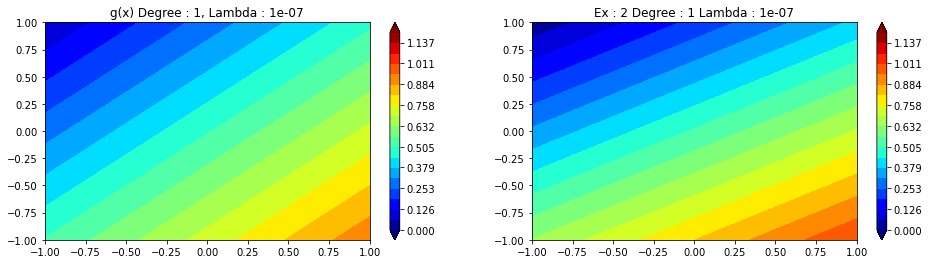

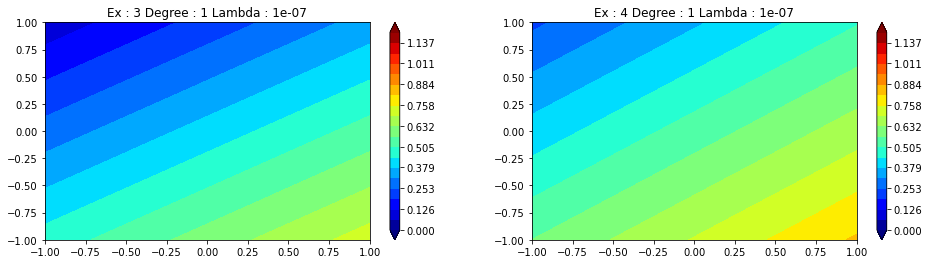

Degree= 1 lambda= 1e-07
Bias = 0.0531829124601966
Variance = 0.0038151436917478122
MSE = 0.055566488549449095


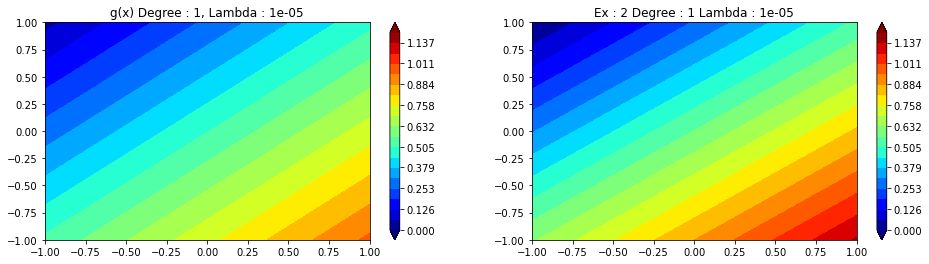

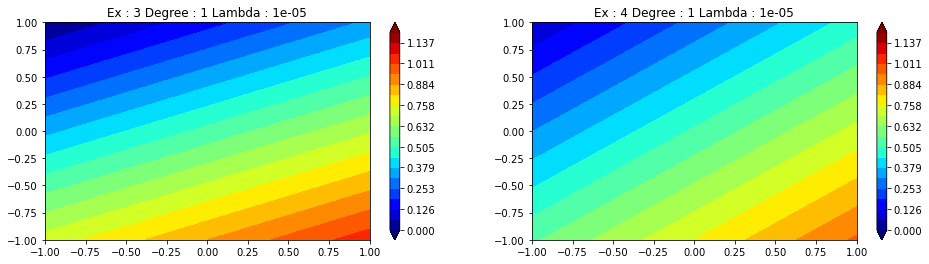

Degree= 1 lambda= 1e-05
Bias = 0.05376095997312507
Variance = 0.0032370149882748594
MSE = 0.05714188435336801


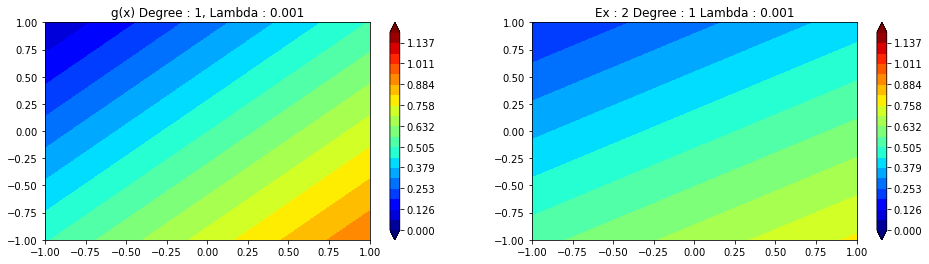

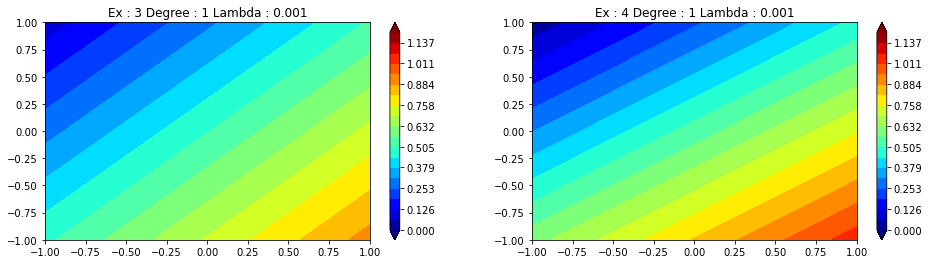

Degree= 1 lambda= 0.001
Bias = 0.054850685604862656
Variance = 0.003558638670513203
MSE = 0.04849242261487717


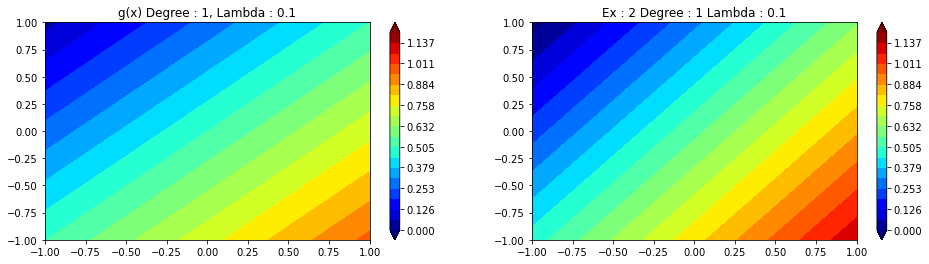

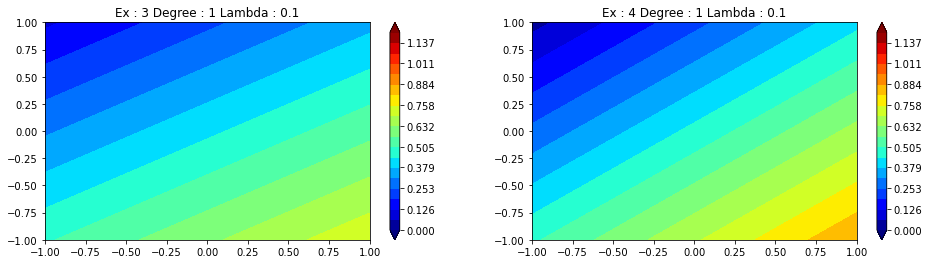

Degree= 1 lambda= 0.1
Bias = 0.05243886468749592
Variance = 0.003688401905894371
MSE = 0.05344766933490987


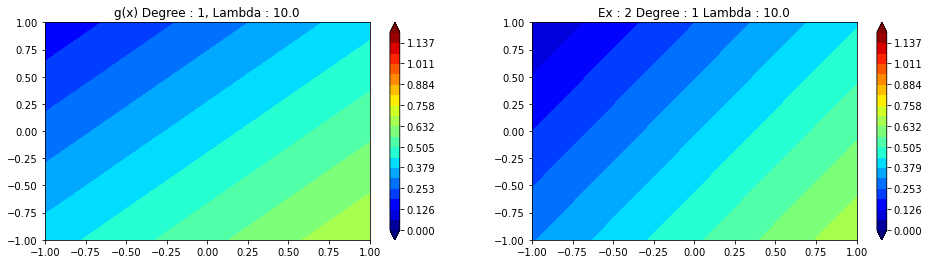

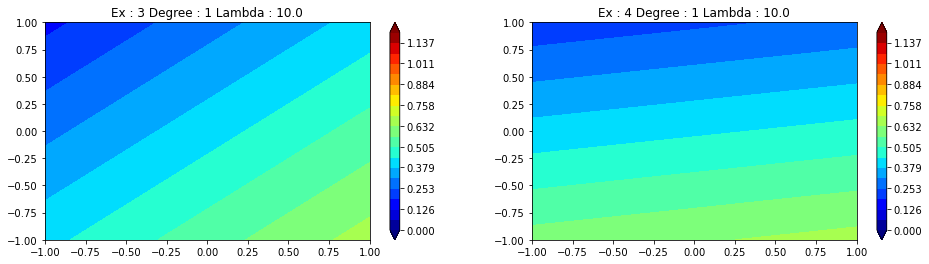

Degree= 1 lambda= 10.0
Bias = 0.06628887788516188
Variance = 0.0017391325888656652
MSE = 0.06731676666631027


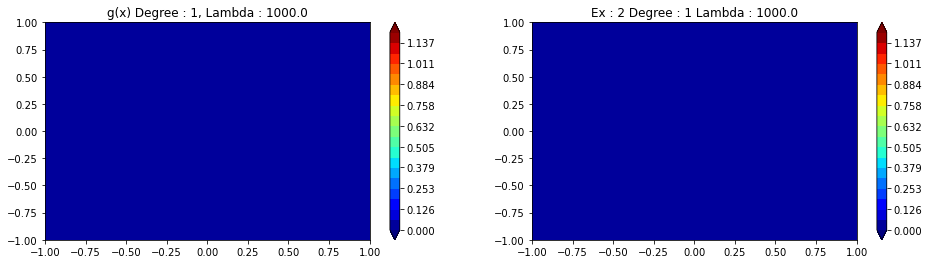

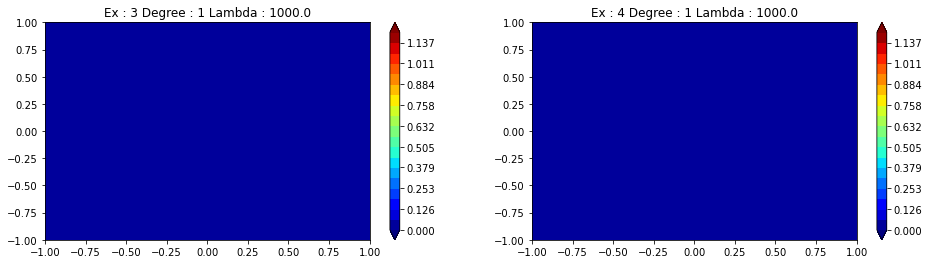

Degree= 1 lambda= 1000.0
Bias = 0.31514894780470637
Variance = 6.266649762395904e-06
MSE = 0.2949815651019979


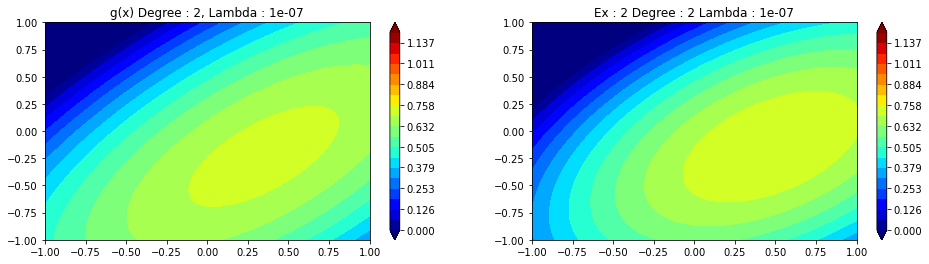

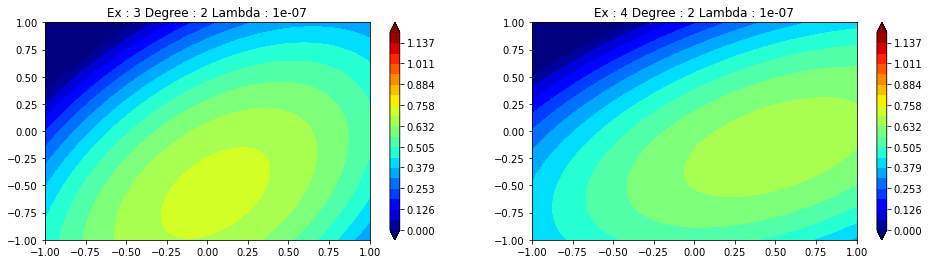

Degree= 2 lambda= 1e-07
Bias = 0.03438624136848667
Variance = 0.004343645600564528
MSE = 0.03508369484885365


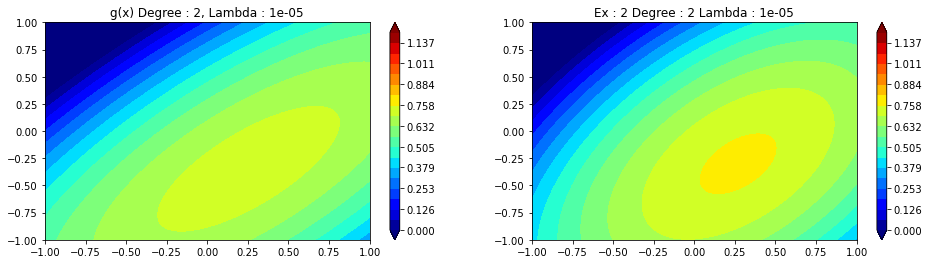

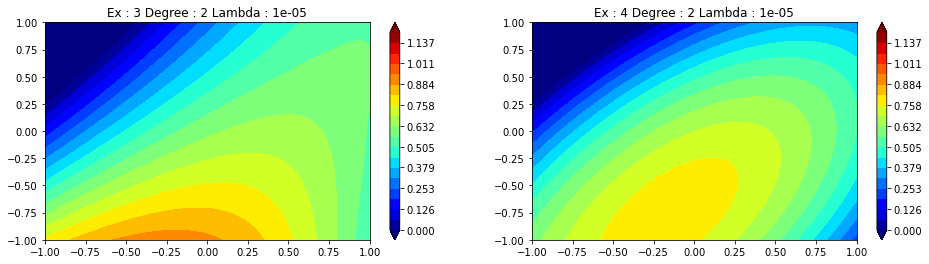

Degree= 2 lambda= 1e-05
Bias = 0.03416727549997903
Variance = 0.004878278522416344
MSE = 0.03531082568200404


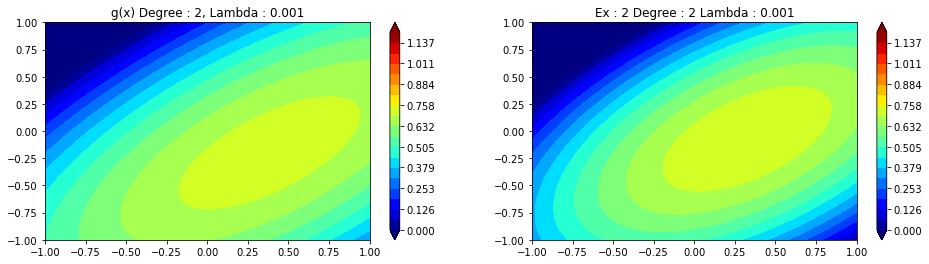

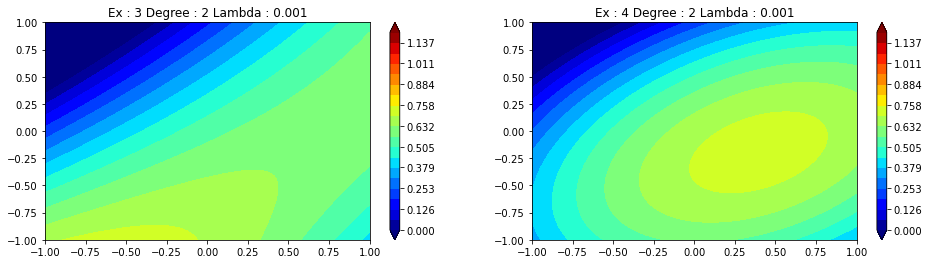

Degree= 2 lambda= 0.001
Bias = 0.033570273554519844
Variance = 0.004512832046484438
MSE = 0.03282956011521975


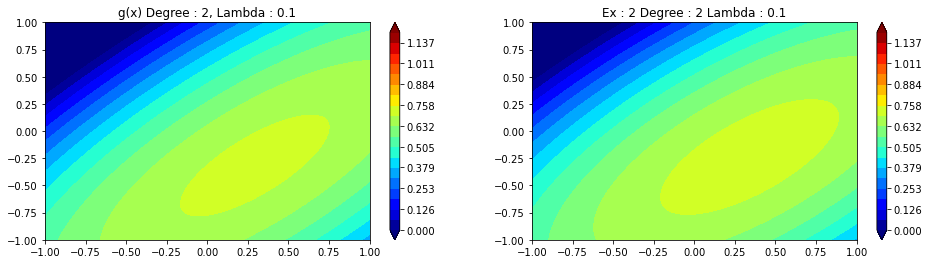

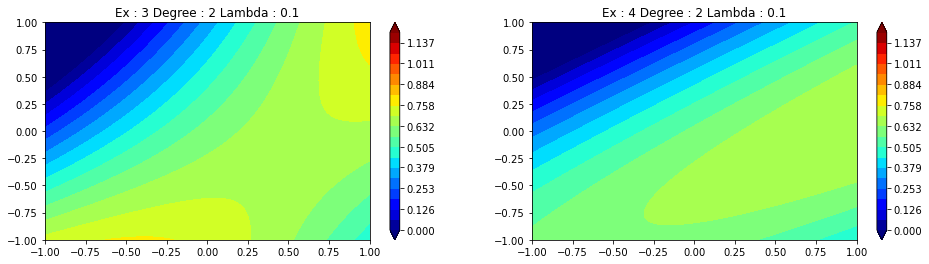

Degree= 2 lambda= 0.1
Bias = 0.03414800895607434
Variance = 0.004446962937537895
MSE = 0.0316566244409805


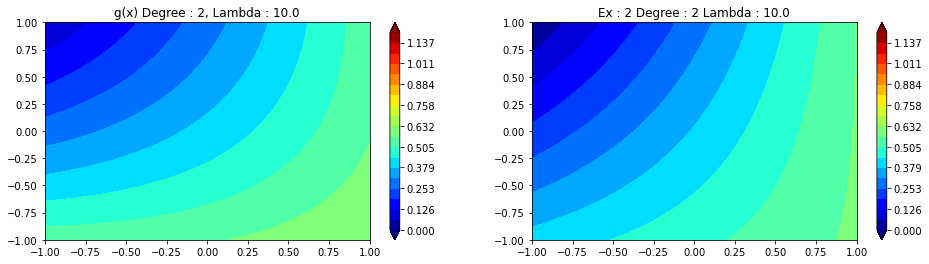

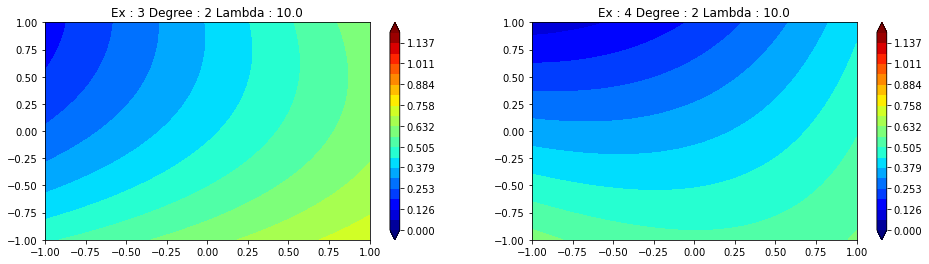

Degree= 2 lambda= 10.0
Bias = 0.06339911334518704
Variance = 0.0018106159408190345
MSE = 0.05872968867486549


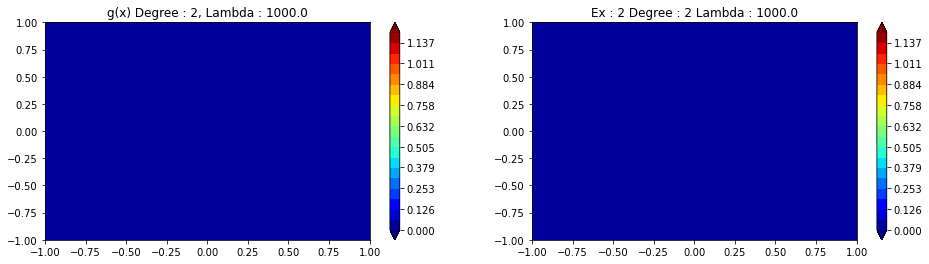

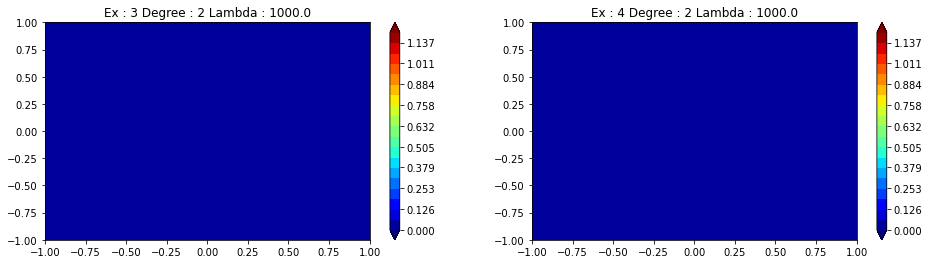

Degree= 2 lambda= 1000.0
Bias = 0.3094344321796139
Variance = 8.561966830254982e-06
MSE = 0.3360196809882025


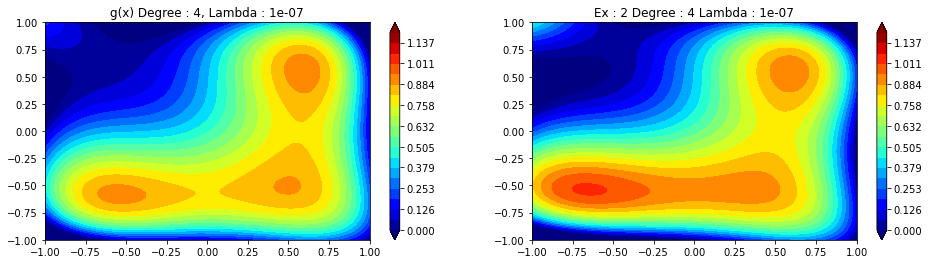

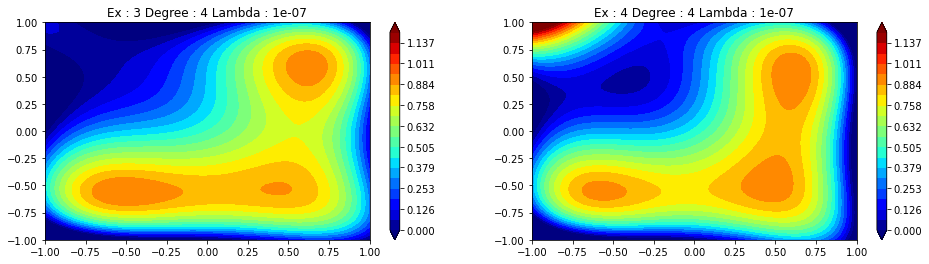

Degree= 4 lambda= 1e-07
Bias = 0.00801367238210546
Variance = 0.004238441538139442
MSE = 0.004641423332306169


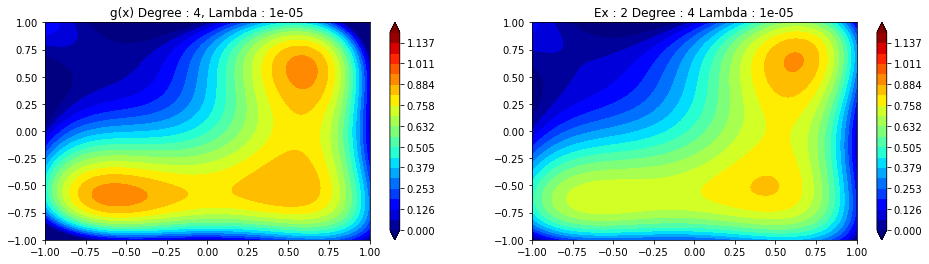

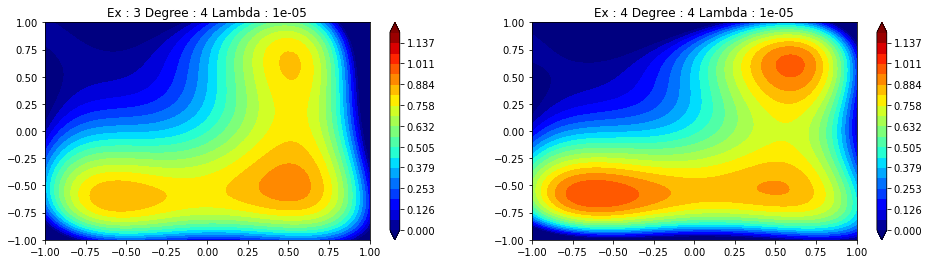

Degree= 4 lambda= 1e-05
Bias = 0.007568244490568359
Variance = 0.0038253237991055697
MSE = 0.003167960958246047


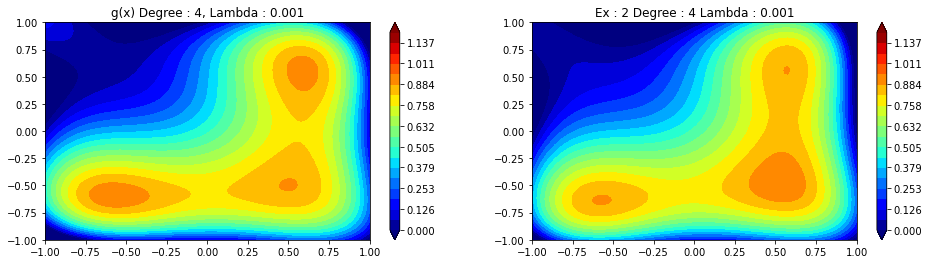

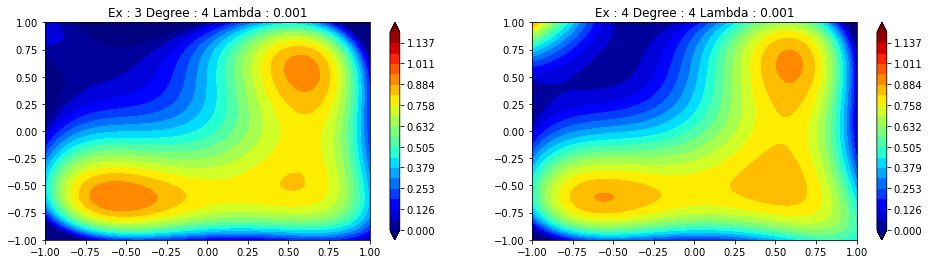

Degree= 4 lambda= 0.001
Bias = 0.007327087191882728
Variance = 0.0036778649194395235
MSE = 0.004653276547593975


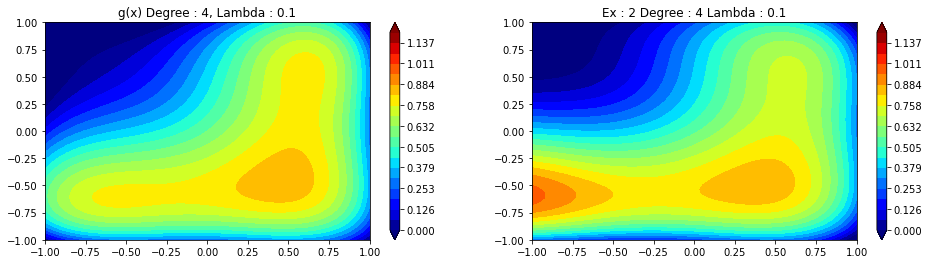

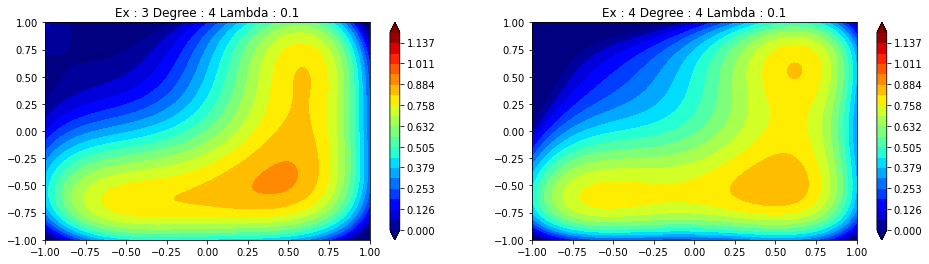

Degree= 4 lambda= 0.1
Bias = 0.009058934694586096
Variance = 0.0018320902493613208
MSE = 0.007313507159579041


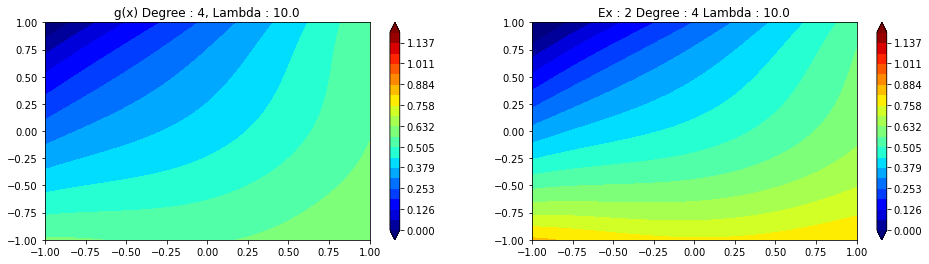

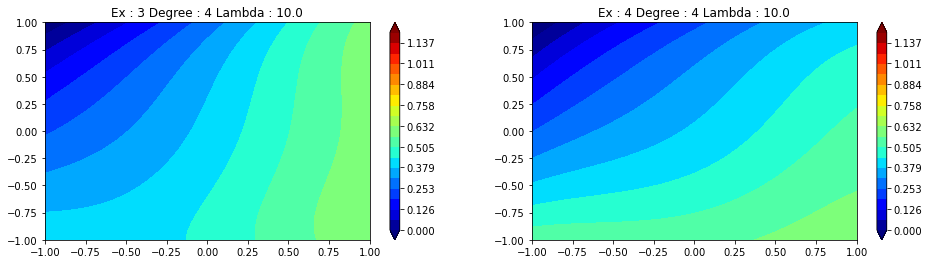

Degree= 4 lambda= 10.0
Bias = 0.057874819473915554
Variance = 0.0019928879358437485
MSE = 0.0531837998293082


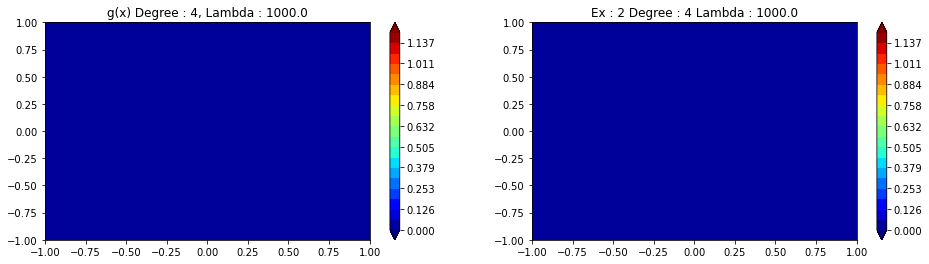

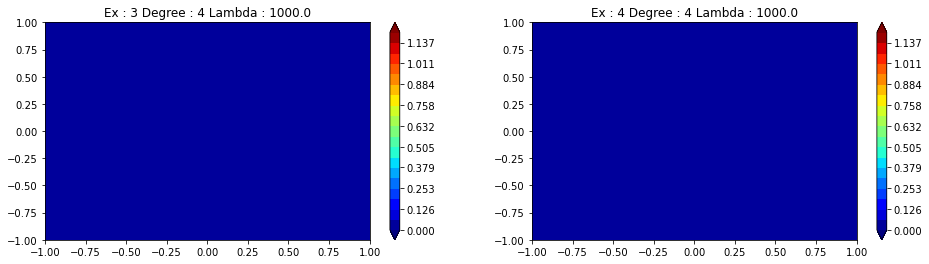

Degree= 4 lambda= 1000.0
Bias = 0.3110524130551258
Variance = 1.1863501309418583e-05
MSE = 0.326060572468072


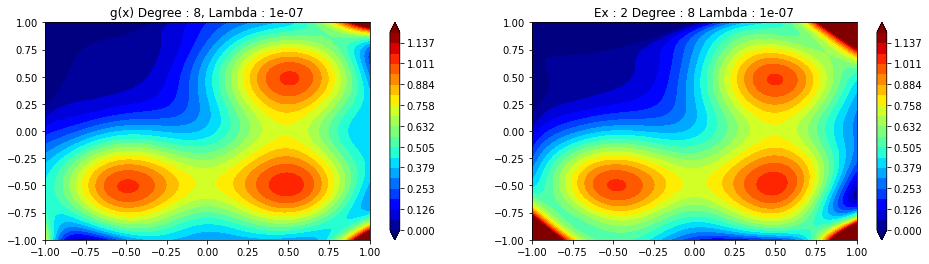

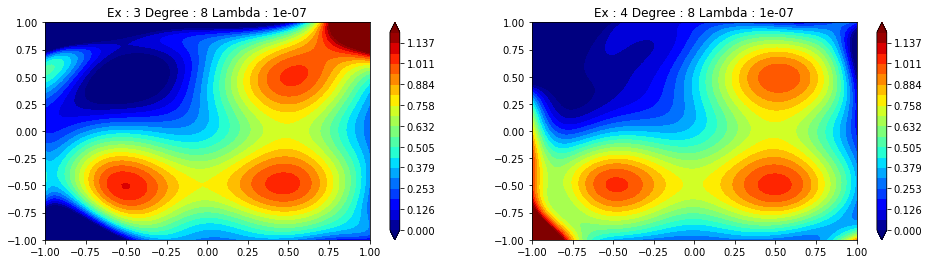

Degree= 8 lambda= 1e-07
Bias = 0.015302964053804047
Variance = 0.015300578970833712
MSE = 7.714750921522274e-07


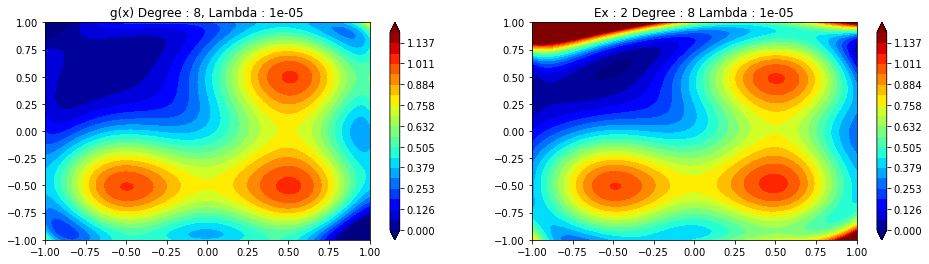

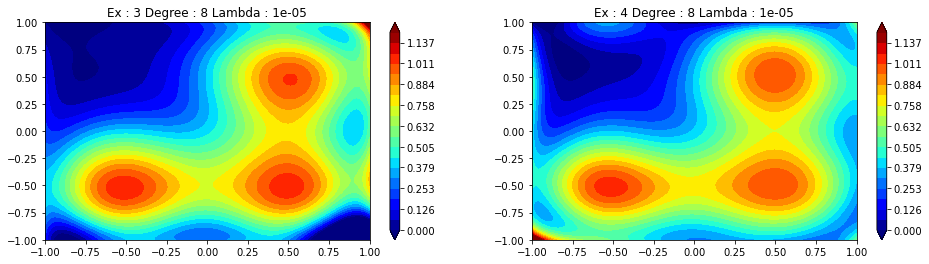

Degree= 8 lambda= 1e-05
Bias = 0.0026917064286009966
Variance = 0.0026669533914180214
MSE = 1.9551902298503966e-05


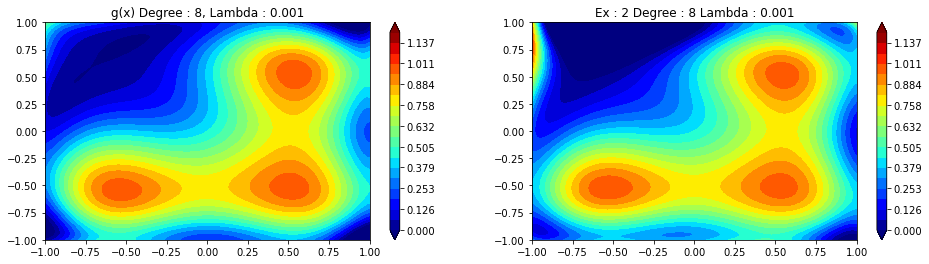

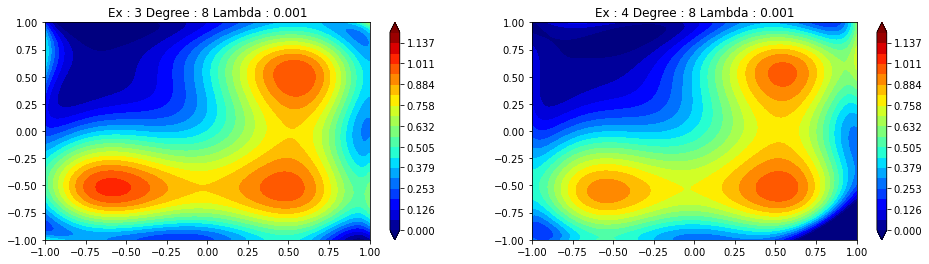

Degree= 8 lambda= 0.001
Bias = 0.004174838293149294
Variance = 0.003727067417626459
MSE = 0.0003353375286760727


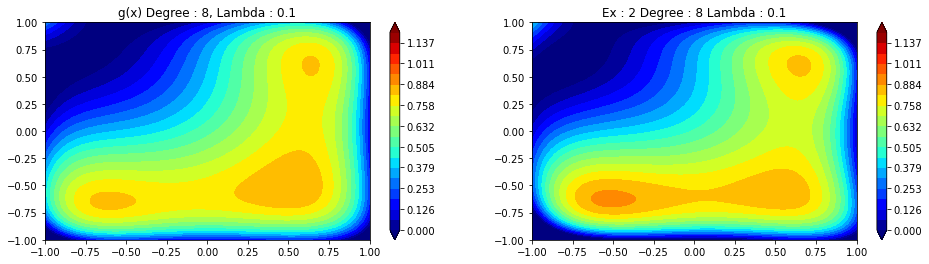

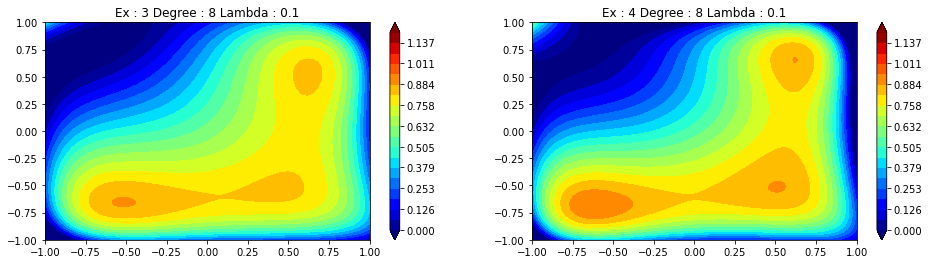

Degree= 8 lambda= 0.1
Bias = 0.009595400949045733
Variance = 0.003162935211282531
MSE = 0.00493363342173112


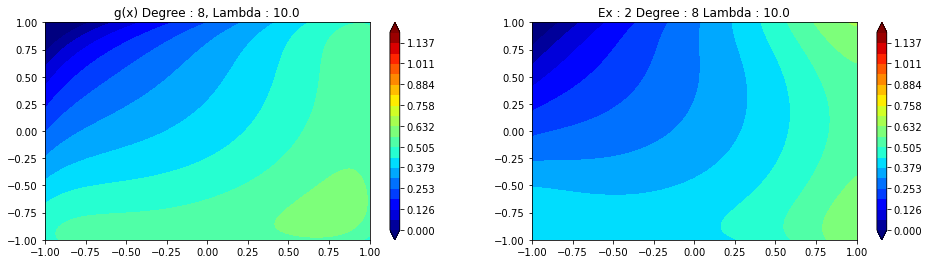

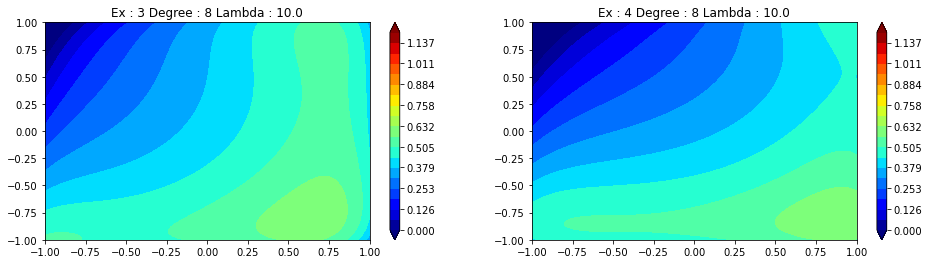

Degree= 8 lambda= 10.0
Bias = 0.05571638930784973
Variance = 0.0023052285913357845
MSE = 0.04546073100007528


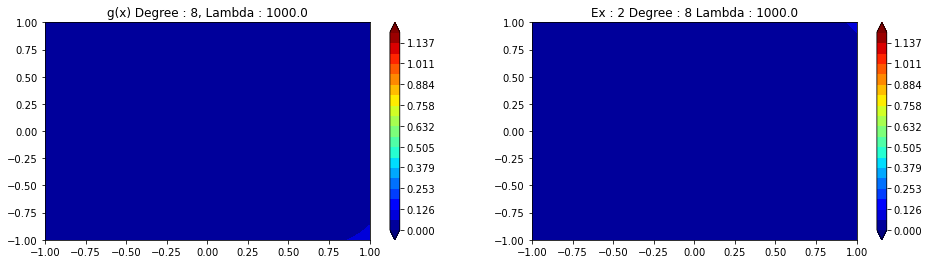

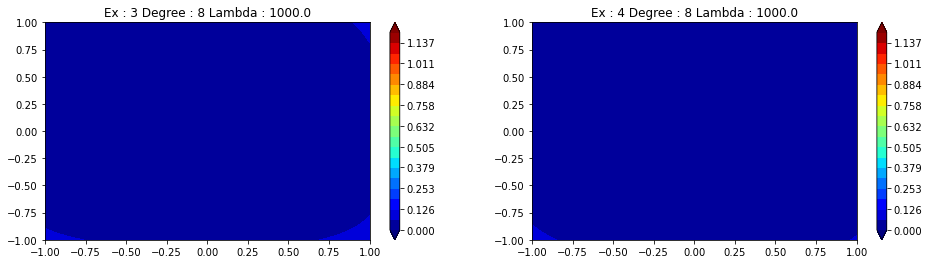

Degree= 8 lambda= 1000.0
Bias = 0.30738152449174133
Variance = 1.372007327669973e-05
MSE = 0.3089566306647724


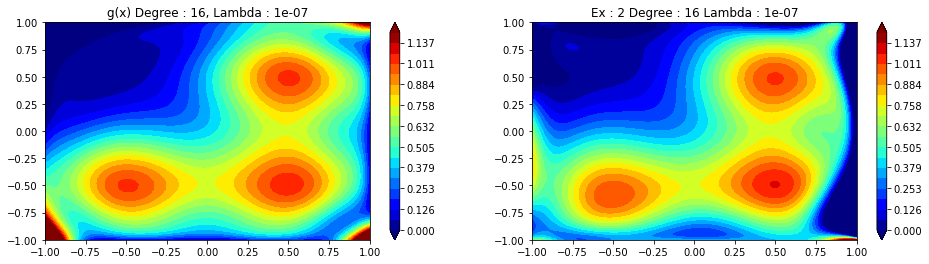

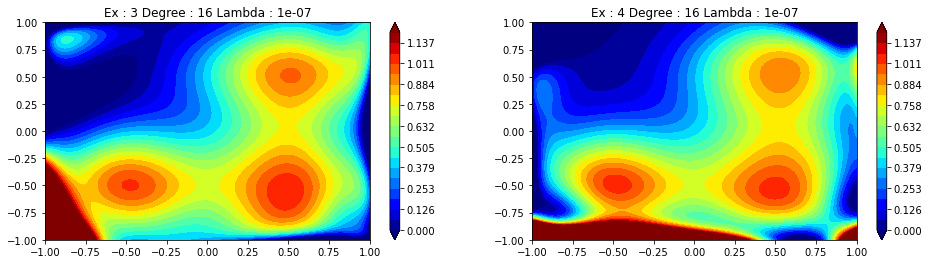

Degree= 16 lambda= 1e-07
Bias = 0.024940869059944852
Variance = 0.02494052708701861
MSE = 8.729825783342629e-08


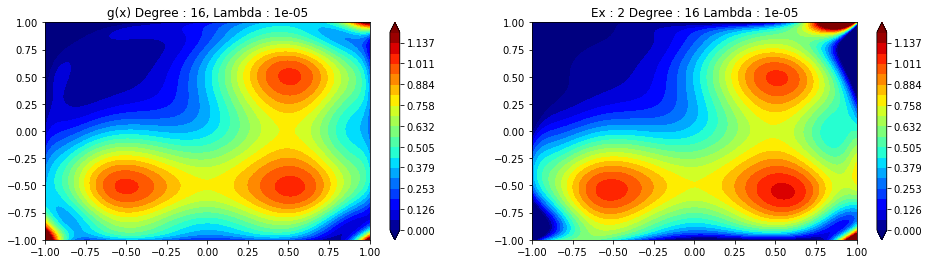

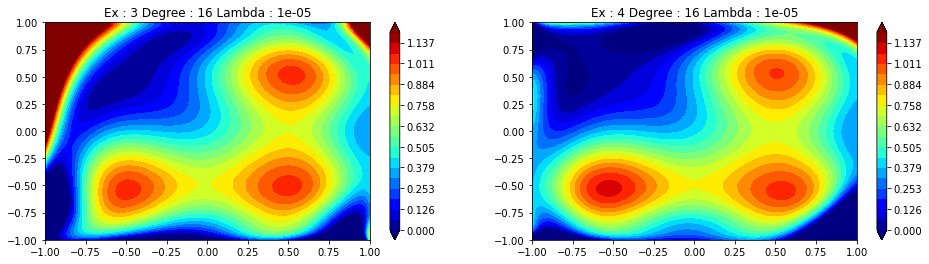

Degree= 16 lambda= 1e-05
Bias = 0.007390413273156284
Variance = 0.007377097927749784
MSE = 4.509504477069999e-06


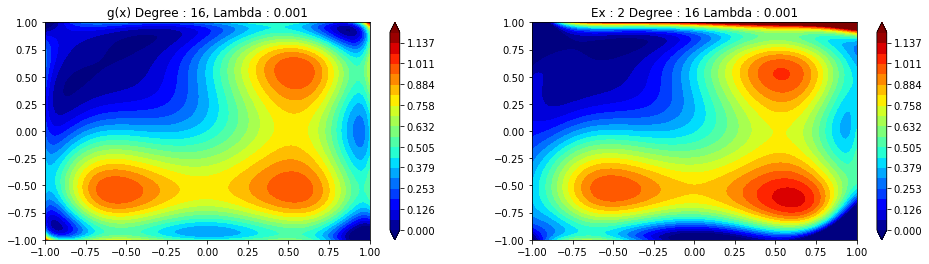

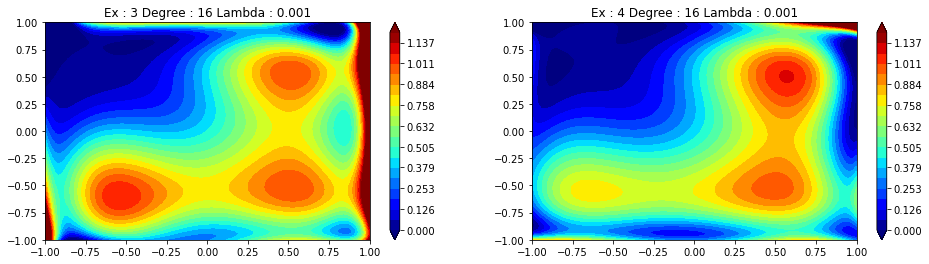

Degree= 16 lambda= 0.001
Bias = 0.004583223459734409
Variance = 0.004200146538096726
MSE = 0.000199649566991237


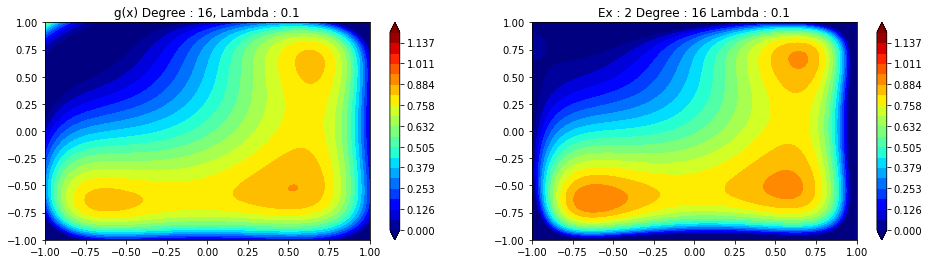

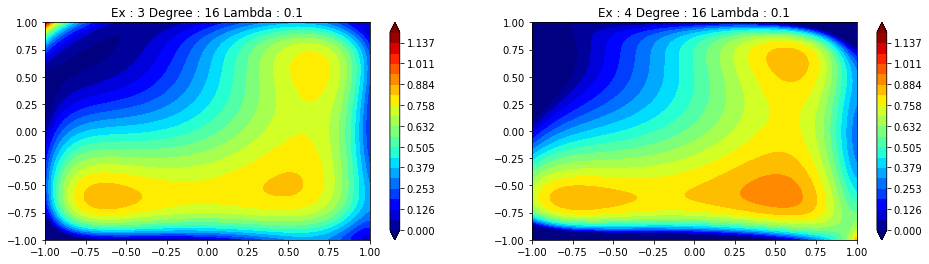

Degree= 16 lambda= 0.1
Bias = 0.010208943534013895
Variance = 0.004700942449414071
MSE = 0.003984056267399314


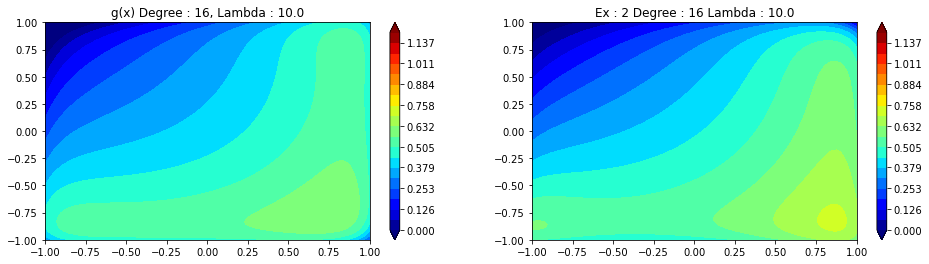

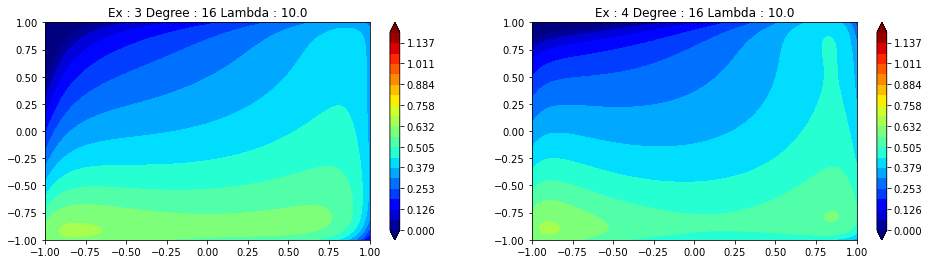

Degree= 16 lambda= 10.0
Bias = 0.05507969002774621
Variance = 0.002222266973972091
MSE = 0.036812953806083064


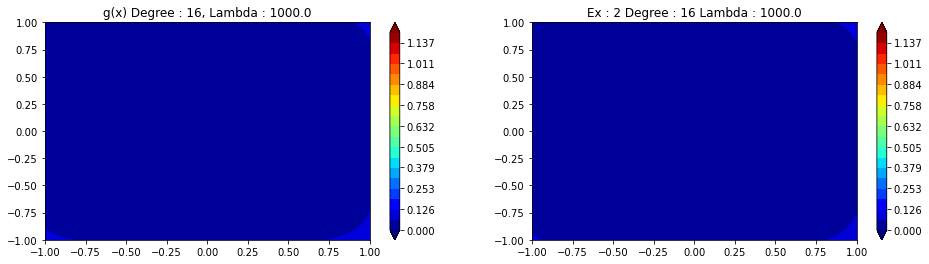

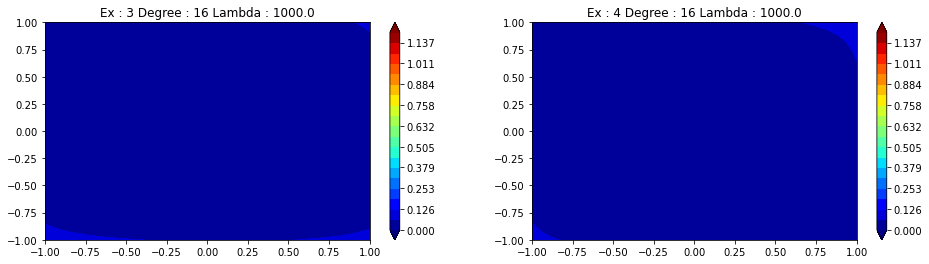

Degree= 16 lambda= 1000.0
Bias = 0.3120426818336162
Variance = 1.9969251853931412e-05
MSE = 0.2685299315552867


In [5]:
# Cell type : CodeWrite
def y(x):
    a = np.array([0.5, 0.5])
    b = np.array([-0.5, -0.5])
    c = np.array([0.5, -0.5])
    s = np.exp(-4 * (np.linalg.norm(x - a))**2) + np.exp(-4 * (np.linalg.norm(x - b))**2) + np.exp(-4 * (np.linalg.norm(x - c))**2)
    return s
def poly(x, deg):
    l = []
#     print(x)
    a, b = x[0], x[1]
    for i in range(deg+1):
        for j in range(deg+1):
            if i+j > deg:
                break
            else:
                y = (a**i)*(b**j)
                l.append(y)
    return l
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """

    m = X_test.shape[0]
    trans = []
    for i in range(m):
        x = X_test[i]
        nx = poly(x, degree)
        trans.append(nx)
    trans = np.array(trans)
    preds = trans @ (wt_vector)
    return preds
def visualise_polynomial_2d(wt_vector, degree, sub, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    
    # I HAVE PLOTTED IN THE COMPUTE ERROR FUNCTION ITSELF
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    # Get Z using other functions
    plt.subplot

    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    trans = []
#     print(X_train.shape)
    m = X_train.shape[0]
    trans = []
    for i in range(m):
        x = X_train[i]
        nx = poly(x, degree)
        trans.append(nx)
    trans = np.array(trans)
    mat = trans.T @ trans + reg_param * np.identity(trans.shape[1])
#     print(mat.shape, 'mat', trans.shape, 'trans', Y_train.shape)
#     print(np.linalg.inv(mat), trans.T, Y_train)
    w_hat = (np.linalg.inv(mat) @ trans.T) @ Y_train
    
    return w_hat
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 
    
    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    # ONE RUN TO GET SIZE OF W VECTOR 
    X_train, Y_train = [], []
    for i in range(num_training_samples):
        sample = np.random.uniform(-1,1,(1,2))
        X_train.append(sample[0])
        Y_train.append(y(sample[0]))
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    w_hat = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
    # INITIALIZING W_MEAN VECTOR
    w = [0 for _ in range(w_hat.shape[0])]
    error = 0
    rem_w = []
    idx = 0
    for _ in range(100):
        X_train, Y_train = [], []
        for i in range(num_training_samples):
            sample = np.random.uniform(-1,1,(1,2))
            X_train.append(sample[0])
            Y_train.append(y(sample[0]))
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        w_hat = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        preds = polynomial_regression_ridge_pred(X_train, w_hat, degree)
        if _ % 33 == 0:
            rem_w.append(w_hat)
        e = 0
        for i in range(num_training_samples):
            e += (preds[i] - Y_train[i]) ** 2
        e /= num_training_samples
        error += e

        for j in range(len(w)):
            w[j] += w_hat[j]

    for i in range(len(w)):
        w[i] /= 100
    error /= 100
    b, v = 0, 0
    for _ in range(100):
        X_train, Y_train = [], []
        for i in range(num_training_samples):
            sample = np.random.uniform(-1,1,(1,2))
            X_train.append(sample[0])
            Y_train.append(y(sample[0]))
        
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        w_hat = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        preds = polynomial_regression_ridge_pred(X_train, w_hat, degree)
        preds1 = polynomial_regression_ridge_pred(X_train, w, degree)
        
        for i in range(num_training_samples):
            b += (preds1[i] - Y_train[i]) ** 2
            v += (preds[i] - preds1[i])**2

    bias = b / 5000
    var = v / 5000
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 4))
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100)) 
    arr = []
    for i in X:
        for j in Y:
            arr.append([i,j])
    arr = np.array(arr)
    C = (np.c_[X.ravel(),Y.ravel()])

    Z = polynomial_regression_ridge_pred(C, w, degree)
    Z = np.array(Z).reshape((100,100))
    cont = ax1.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20), cmap='jet',extend='both')
    ax1.set_title("g(x) Degree : {}, Lambda : {}".format(degree, reg_param))

    fig.colorbar(cont, ax=ax1)
    num = 2
    for i in range(3):
        X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
        
        C = (np.c_[X.ravel(),Y.ravel()])
        Z = polynomial_regression_ridge_pred(C, rem_w[i], degree)
        Z = np.array(Z).reshape((100,100))
        if i == 0:
            cont1 = ax2.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap='jet',extend='both')
            ax2.set_title("Ex : {} Degree : {} Lambda : {}".format(num, degree, reg_param))
            fig.colorbar(cont1, ax=ax2)
        if i == 1:
            cont3 = ax3.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap='jet',extend='both')
            ax3.set_title("Ex : {} Degree : {} Lambda : {}".format(num, degree, reg_param))
            fig1.colorbar(cont3, ax=ax3)
        if i == 2:
            cont4 = ax4.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap='jet', extend='both')
            ax4.set_title("Ex : {} Degree : {} Lambda : {}".format(num, degree, reg_param))
            fig1.colorbar(cont4, ax=ax4)
        num += 1

    plt.show()
    return bias, var, e
s = 0
matb = [[0 for x in range(6)] for y in range(5)]
matv = [[0 for x in range(6)] for y in range(5)]
mate = [[0 for x in range(6)] for y in range(5)]
i, j = 0, 0
for degree in [1,2,4,8,16]:
    cnt = 0
    s += 1
    j = 0
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        matb[i][j], matv[i][j], mate[i][j] = b, v, e
        j += 1
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
    i += 1

In [7]:
# # Cell type: convenience
# degrees = [1,2,4,8,16]
# reg_param = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
# for i in range(5):
#     for j in range(6):
#         b, v, e = matb[i][j], matv[i][j], mate[i][j]
#         print('================================')
#         print('Degree= '+str(degrees[i])+' lambda= '+str(reg_param[j]))
#         print('Bias = '+str(b))
#         print('Variance = '+str(v))
#         print('MSE = '+str(e))

** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

# Bias Variance Matrix

Bias Matrix
<table style="width:100%">
<tr>
    <th>Degree / Lambda</th>
    <th>1e-7</th>
    <th>1e-5</th>
    <th>0.001</th>
    <th>0.1</th>
    <th>10</th>
    <th>1000</th>
</tr>

<tr>
    <td>1</td>
    <td>0.0542</td>
    <td>0.056</td>
    <td>0.054</td>
    <td>0.056</td>
    <td>0.066</td>
    <td>0.307</td>
</tr>
 <tr>
    <td>2</td>
    <td>0.035</td>
    <td>0.0335</td>
    <td>0.03445</td>
    <td>0.034452</td>
    <td>0.0594</td>
    <td>0.308</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0.0073</td>
    <td>0.007335</td>
    <td>0.0074</td>
    <td>0.009</td>
    <td>0.06</td>
    <td>0.31</td>
  </tr>
  <tr>
    <td>8</td>
    <td>0.0102</td>
    <td>0.0017</td>
    <td>0.004</td>
    <td>0.0092</td>
    <td>0.0573</td>
    <td>0.31</td>
  </tr>
  <tr>
    <td>16</td>
    <td>0.01885</td>
    <td>0.0111</td>
    <td>0.005</td>
    <td>0.0105</td>
    <td>0.055</td>
    <td>0.31</td>
  </tr>
</table>
Variance Matrix
<table style="width:100%">
<tr>
    <th>Degree / Lambda</th>
    <th>1e-7</th>
    <th>1e-5</th>
    <th>0.001</th>
    <th>0.1</th>
    <th>10</th>
    <th>1000</th>
</tr>

<tr>
    <td>1</td>
    <td>0.0038</td>
    <td>0.0032</td>
    <td>0.0036</td>
    <td>0.0034</td>
    <td>0.0015</td>
    <td>6.05</td>
</tr>
 <tr>
    <td>2</td>
    <td>0.0046</td>
    <td>0.0045</td>
    <td>0.0048</td>
    <td>0.0044</td>
    <td>0.002</td>
    <td>9.75</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0.0036</td>
    <td>0.0035</td>
    <td>0.0037</td>
    <td>0.00175</td>
    <td>0.00225</td>
    <td>0.253</td>
  </tr>
  <tr>
    <td>8</td>
    <td>0.01</td>
    <td>0.0017</td>
    <td>0.0035</td>
    <td>0.0028</td>
    <td>0.0244</td>
    <td>1.64</td>
  </tr>
  <tr>
    <td>16</td>
    <td>0.01855</td>
    <td>0.011</td>
    <td>0.0045</td>
    <td>0.0047</td>
    <td>0.002</td>
    <td>2.005</td>
  </tr>
</table>

# Observations

1) We can that the bias increases as the values of Lambda Increases. This is because as we increase the lambda value the model becomes less complicated. <br>
2) The Cariance for a fixed lambda always increases with the degree of the polynomial.<br>
3) For higher degrees we do not have a clear picture as the number of data points used for training are very less. <br>
4) With Lambda set to 1000 the bias values are almost constant. <br>

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




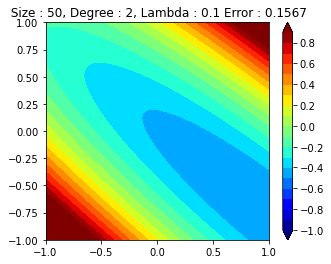

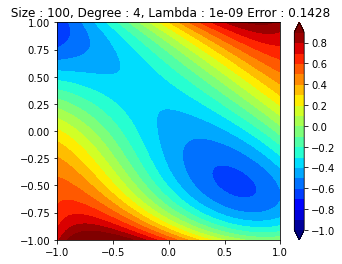

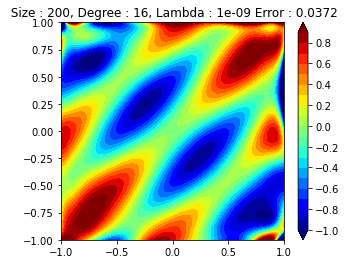

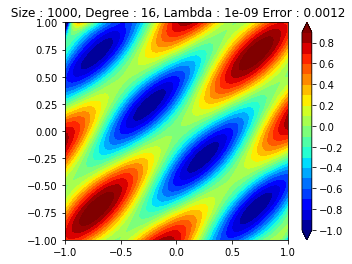

In [130]:
# Cell type : CodeWrite 
import warnings
warnings.filterwarnings('ignore')
def get_mse(preds, y):
    s = 0
    n = len(preds)
    for i in range(n):
        s += (preds[i] - y[i]) ** 2
    s /= n
    return s

# train4 = np.load('Archive/Dataset4_1.npz')

# CHANGING DATA FOLDER
train4 = np.load('../../Data/Dataset4_1.npz')

X_train, Y_train = train4['arr_0'], train4['arr_1']
X_test, Y_test = train4['arr_2'], train4['arr_3']

size = [50, 100, 200, 1000]
deg = [1, 2, 4, 8, 16]
lmda = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
for t in range(4):
    X = X_train[:size[t]]
    y = Y_train[:size[t]]
    mate = [[0 for x in range(7)] for y in range(6)]
    for i in range(5):
        mate[i+1][0] = deg[i]
        for j in range(6):
            mate[0][j+1] = lmda[j]
            degree, lamda = deg[i], lmda[j]
            wt_vector = polynomial_regression_ridge_train(X, y, degree, lamda)
            preds = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
            error = get_mse(preds, Y_test)
            mate[i+1][j+1] = error

    error = 1e9

    d, l = 0, 0
    for i in range(6):
        if i == 0:
#             print(" -- ")
            for j in range(1, 7):
                pass
#                 print("Lambda : {}".format(lmda[j-1]), end=' ')
#             print('\n')
            continue
        for j in range(1, 7):
            if mate[i][j] < error:
                error = mate[i][j]
                d = deg[i-1]
                l = lmda[j-1]

    wt_vector = polynomial_regression_ridge_train(X, y, d, l)
    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100)) 
    plt.figure(figsize=(5,4))
    C = (np.c_[X.ravel(),Y.ravel()])
    Z = polynomial_regression_ridge_pred(C, wt_vector, d)
    Z = np.array(Z).reshape((100,100))

    plt.contourf(X,Y,Z,levels=np.linspace(-1.,0.9 , 20), cmap='jet', extend='both')
    plt.title(" Size : {}, Degree : {}, Lambda : {} Error : {:0.4f}".format(size[t], d, l, error))
    plt.colorbar()
    plt.show()

# Tables
Best Parameters

| DataSet Size 	| Lambda 	| Degree 	|
|--------------	|--------	|--------	|
| 50           	| 0.1    	| 2      	|
| 100          	| 1e-9   	| 4      	|
| 200          	| 1e-9   	| 16     	|
| 1000         	| 1e-9   	| 16     	|

For 50 Samples

| Degree / Lambda 	| 1e-09    	| 1e-07   	| 1e-05   	| 0.001   	| 0.1      	| 10.0     	|
|-----------------	|----------	|---------	|---------	|---------	|----------	|----------	|
| 1               	| 0.301    	| 0.3012  	| 0.30126 	| 0.300 	| 0.3008   	| 0.27835  	|
| 2               	| 0.1579   	| 0.1579  	| 0.15789 	| 0.15788 	| 0.15673  	| 0.208223 	|
| 4               	| 0.1573   	| 0.1573  	| 0.1573  	| 0.1572  	| 0.1618   	| 0.1965   	|
| 8               	| 237.7    	| 172.5   	| 18.59   	| 0.99025 	| 0.161588 	| 0.19399  	|
| 16              	| 249.7711 	| 232.026 	| 66.70   	| 2.337   	| 0.204    	| 0.196    	|

For 100 Samples

| Degree / Lambda 	| 1e-09  	| 1e-07  	| 1e-05  	| 0.001  	| 0.1    	| 10.0   	|
|-----------------	|--------	|--------	|--------	|--------	|--------	|--------	|
| 1               	| 0.273  	| 0.273  	| 0.273  	| 0.273  	| 0.273  	| 0.268  	|
| 2               	| 0.153  	| 0.153  	| 0.153  	| 0.1532 	| 0.1529 	| 0.1757 	|
| 4               	| 0.1427 	| 0.1427 	| 0.1428 	| 0.1428 	| 0.146  	| 0.169  	|
| 8               	| 0.713  	| 0.711  	| 0.58   	| 0.203  	| 0.1626 	| 0.1711 	|
| 16              	| 54.08  	| 11.77  	| 23.41  	| 0.417  	| 0.188  	| 0.1741 	|

For 200 Samples

| Degree / Lambda 	| 1e-09   	| 1e-07   	| 1e-05   	| 0.001   	| 0.1     	| 10.0   	|
|-----------------	|---------	|---------	|---------	|---------	|---------	|--------	|
| 1               	| 0.267   	| 0.267   	| 0.267   	| 0.267   	| 0.267   	| 0.266  	|
| 2               	| 0.1457  	| 0.1457  	| 0.1457  	| 0.1457  	| 0.1457  	| 0.1586 	|
| 4               	| 0.13118 	| 0.13118 	| 0.13117 	| 0.13116 	| 0.13083 	| 0.1570 	|
| 8               	| 0.1373  	| 0.1373  	| 0.137   	| 0.1181  	| 0.1139  	| 0.1564 	|
| 16              	| 0.037   	| 0.0837  	| 0.1708  	| 0.087   	| 0.1112  	| 0.1522 	|

For 1000 Samples

| Degree / Lambda 	| 1e-09  	| 1e-07  	| 1e-05  	| 0.001   	| 0.1     	| 10.0   	|
|-----------------	|--------	|--------	|--------	|---------	|---------	|--------	|
| 1               	| 0.262  	| 0.262  	| 0.262  	| 0.0262  	| 0.262   	| 0.2625 	|
| 2               	| 0.1424 	| 0.1424 	| 0.1424 	| 0.1424  	| 0.1424  	| 0.1445 	|
| 4               	| 0.1270 	| 0.1270 	| 0.1270 	| 0.12708 	| 0.12724 	| 0.141  	|
| 8               	| 0.084  	| 0.084  	| 0.0848 	| 0.0839  	| 0.098   	| 0.135  	|
| 16              	| 0.0012 	| 0.0015 	| 0.011  	| 0.049   	| 0.09    	| 0.127  	|

# Observations

1) With Lesser Data, for 50 samples we get the least MSE for degree 2, for slightly more data 100 samples, we get least MSE for degree 4. When we have more data, 200 and 1000 samples we get the least MSE for degree 16. <br>
2) As the Data available for training increases, the regularization that needs to be applied decreases. The hyperparameter Lambda also decreases with the increase in amount of data. 
For 50 it is 0.1 and for 100, 200 and 1000 it is 1e-9.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












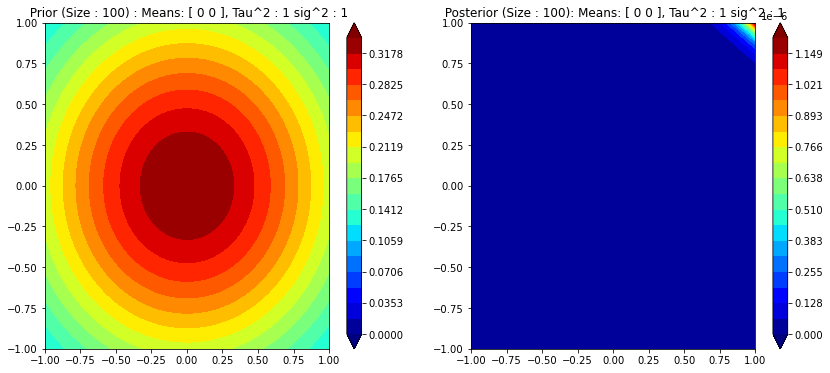

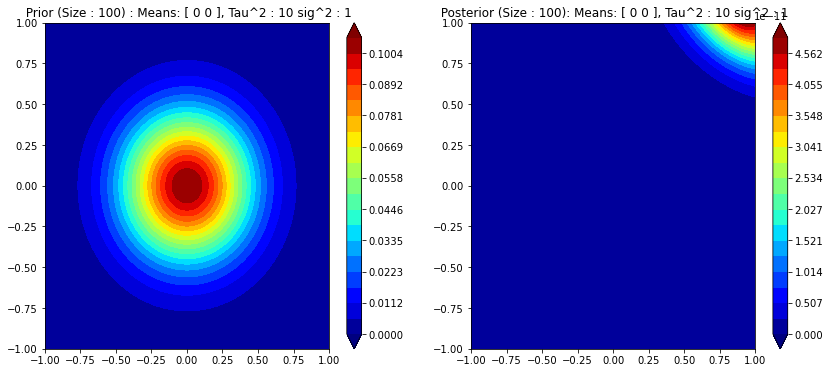

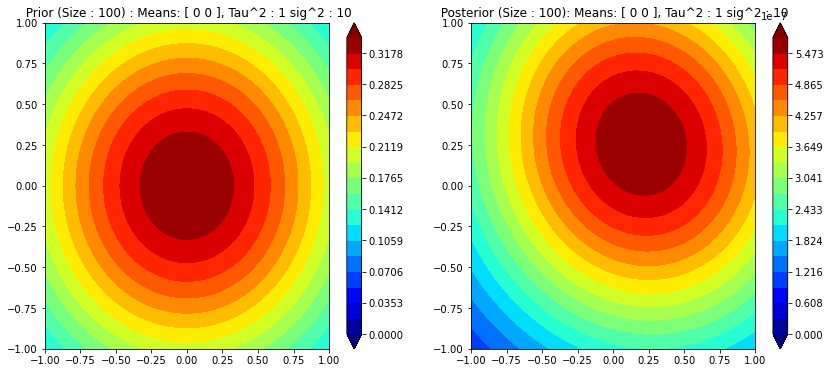

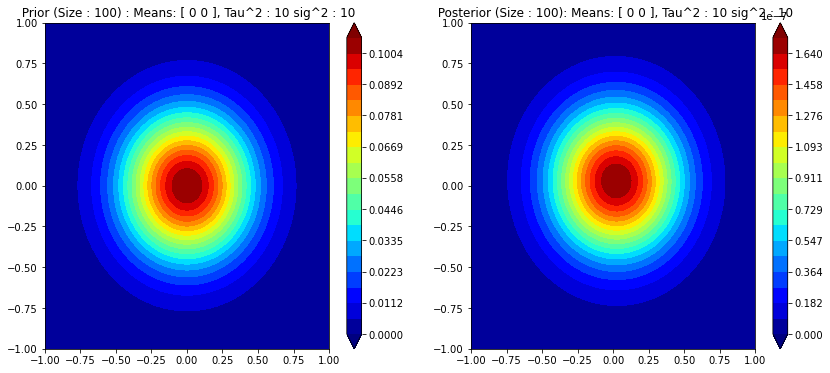

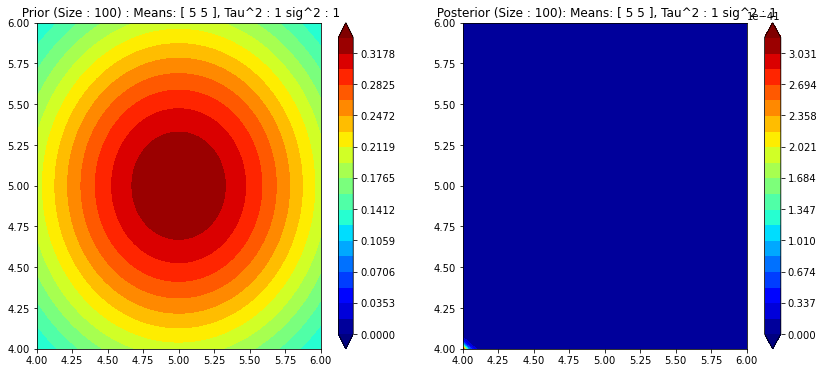

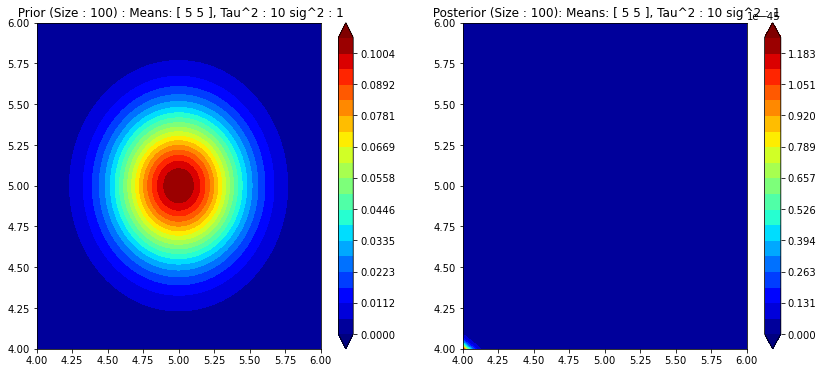

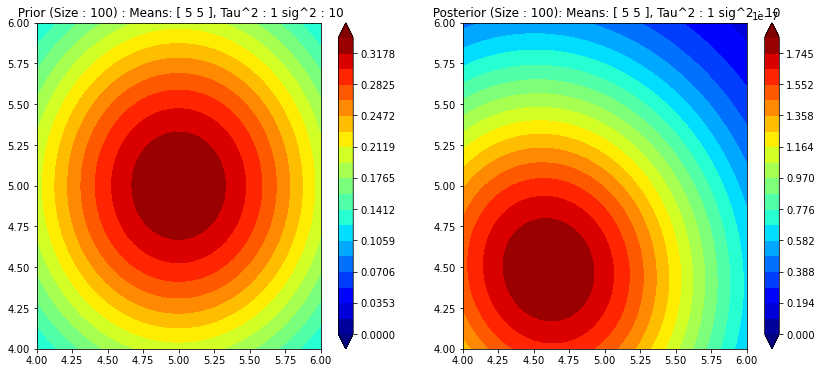

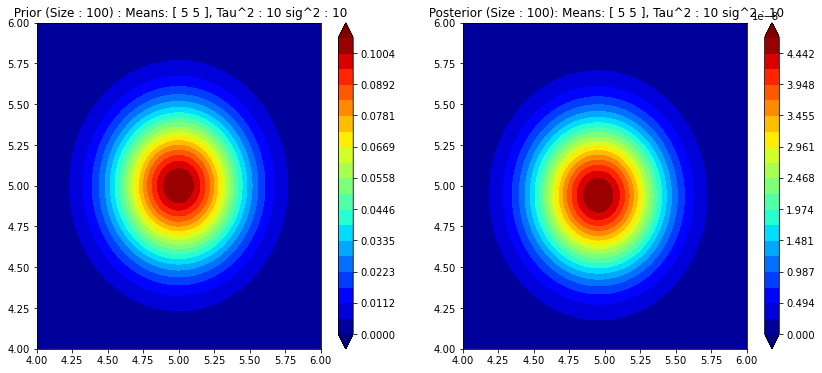

/Users/esameerkumar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1026: RuntimeWarning: overflow encountered in true_divide
  resdat /= (vmax - vmin)


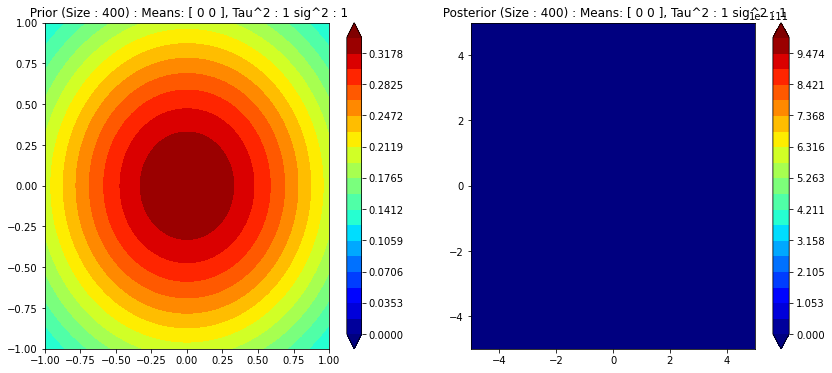

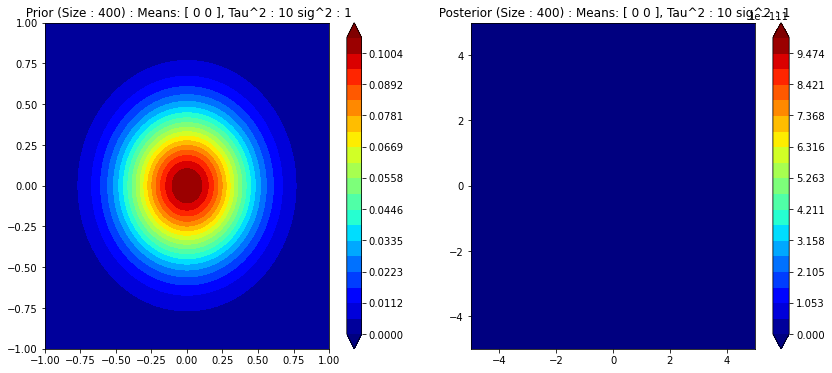

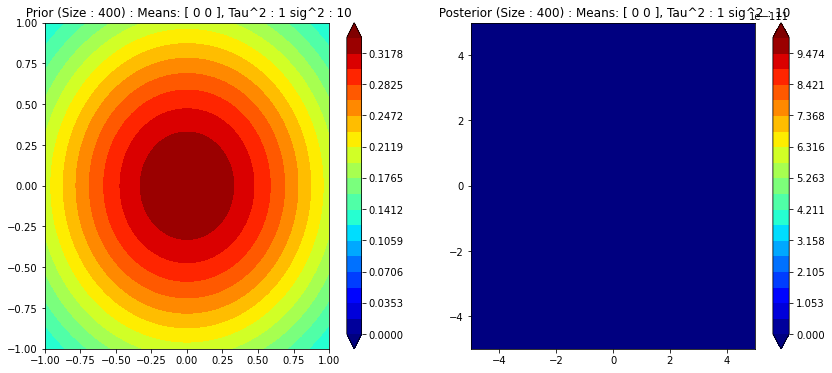

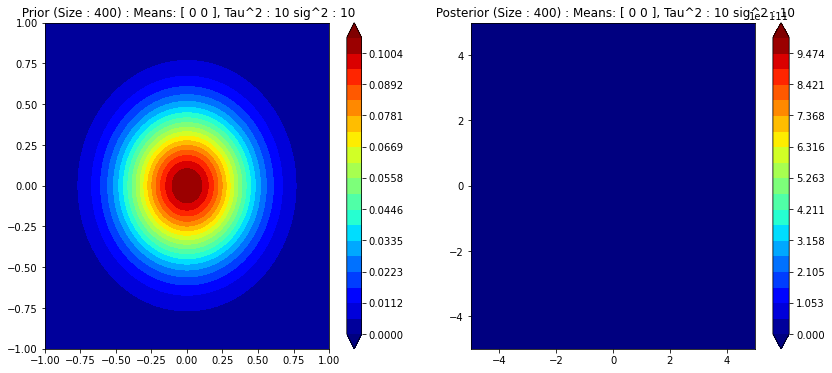

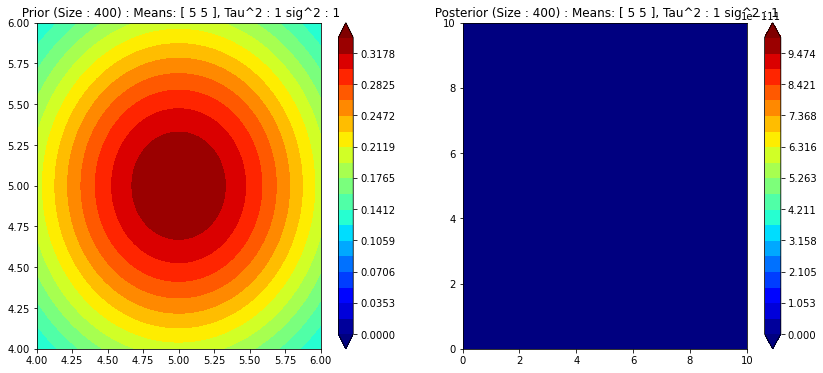

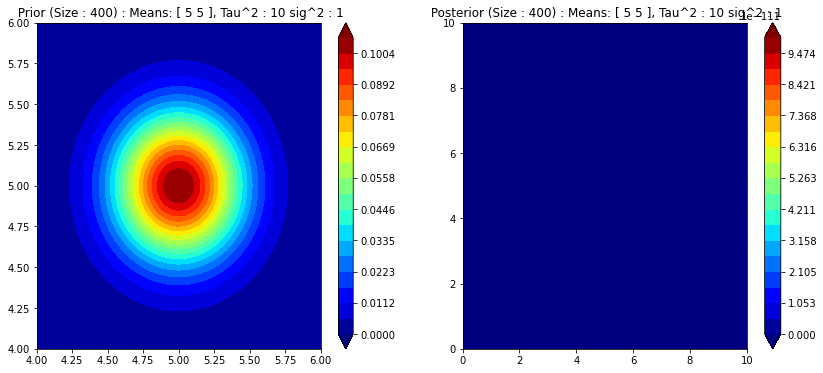

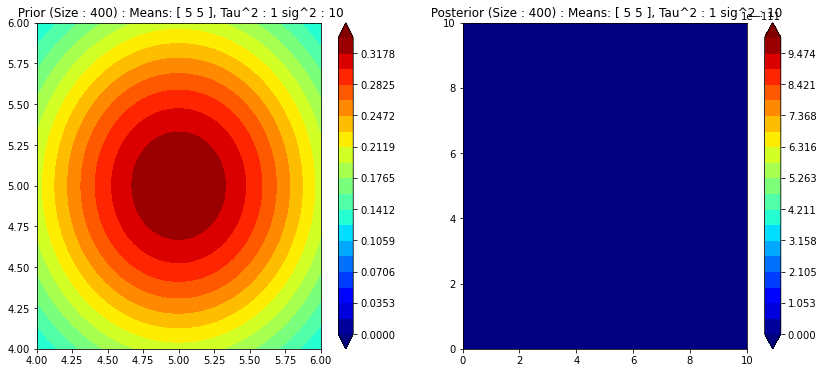

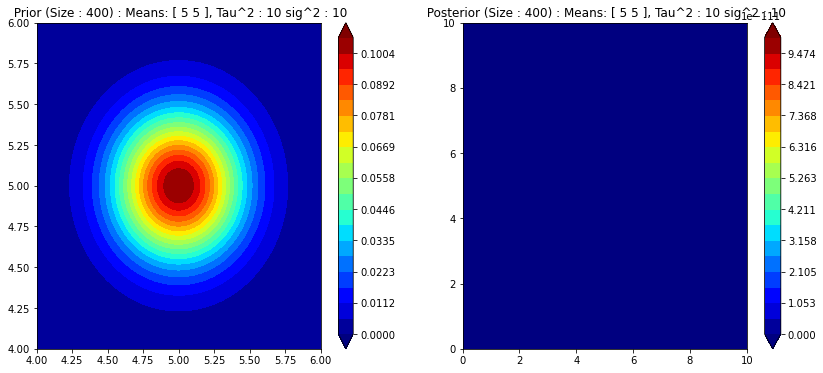

In [6]:
# Cell type : CodeWrite 
import math
def normal(x,mu,cov,tau):
    den = math.sqrt(2*math.pi*tau)
    num = math.exp(-((x - mu)**2)/(2*tau))
    return num / den

def prior(X, mu, sig, tau):
    cov = (tau)*np.identity(2)
    res = 1
    ans = []
    for i in range(len(X)):
        x = np.array(X[i])
        x = x.reshape((1,2))
        mean = np.array(mu)
        mean = mean.reshape((1,2))
        num = math.exp(-0.5*((np.subtract(x,mean)) @ cov @ (np.subtract(x,mean)).T))
        den = (2*math.pi*np.linalg.norm(cov))**(1/(len(X[i])))
        ans.append(num / den)
    return np.array(ans)
    for i in range(len(X)):
        res = 1
        res *= normal(X[i][0],mu[0],cov,tau)
        res *= normal(X[i][1],mu[1],cov,tau)
        ans.append(res)
    return np.array(ans)

def posterior(Z, mu, data, sig, tau):
    cov = (tau)*np.identity(2)
    res = 1
    ans = []
    for i in range(len(Z)):
        res = 1
        for j in range(len(data)):
            den = sig * math.sqrt(2*math.pi)
            num = -(1/(2*sig**2))*(data[j][1] - Z[i][0]*data[j][0][0] - Z[i][1]*data[j][0][1])**2
            num = math.exp(num)
            res*= (num / den)
        z = np.array(Z[i])
        z = z.reshape((1,2))
        mean = np.array(mu)
        mean = mean.reshape((1,2))

        num = math.exp(-0.5*((np.subtract(z,mean)) @ cov @ (np.subtract(z,mean)).T))
        den = (2*math.pi*np.linalg.norm(cov))**(1/(len(Z[i])))
        res*=(num / den)
        ans.append(res)
    return np.array(ans)
params = [[0, 0, 1, 1], [0, 0, 10, 1], [0, 0, 1, 10], [0, 0, 10, 10],\
         [5, 5, 1, 1], [5, 5, 10, 1], [5, 5, 1, 10], [5, 5, 10, 10]]
data = [[[1, 2], 5.1], [[2, 2.1],6.1],[[0.6,1.5],4.2],[[1.1,0.1],2.9]]
data2 = []
for i in range(400):
    data2.append(data[i%4])
for i in range(8):
    X,Y = np.meshgrid(np.linspace(params[i][0]-1,params[i][1]+1,100), np.linspace(params[i][0]-1,params[i][1]+1,100))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
    C = (np.c_[X.ravel(),Y.ravel()])
    Z = prior(C, params[i][:2], params[i][3], params[i][2])
    
    Z = np.array(Z).reshape((100,100))
    zmin = np.min(Z)
    zmax = np.max(Z)

    cs1 = ax1.contourf(X,Y,Z,levels=np.linspace(0.,zmax+1e-110 , 20), extend='both',cmap='jet')
    ax1.set_title(" Prior (Size : 100) : Means: [ {} {} ], Tau^2 : {} sig^2 : {}".format(params[i][0], params[i][1], params[i][2],params[i][3]))
    
    Z = posterior(C, params[i][:2], data, params[i][3], params[i][2])
    Z = np.array(Z).reshape((100,100))
    zmin = np.min(Z)
    zmax = np.max(Z)
    cs2 = ax2.contourf(X,Y,Z,levels=np.linspace(0.,zmax+1e-110 , 20),extend='both',cmap='jet')
    ax2.set_title(" Posterior (Size : 100): Means: [ {} {} ], Tau^2 : {} sig^2 : {}".format(params[i][0], params[i][1], params[i][2],params[i][3]))
    fig.colorbar(cs1,ax=(ax1))
    fig.colorbar(cs2,ax=(ax2))
    plt.show()
    
for i in range(8):
    X,Y = np.meshgrid(np.linspace(params[i][0]-1,params[i][1]+1,100), np.linspace(params[i][0]-1,params[i][1]+1,100))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
    C = (np.c_[X.ravel(),Y.ravel()])
    Z = prior(C, params[i][:2], params[i][3], params[i][2])
    
    Z = np.array(Z).reshape((100,100))
    zmin = np.min(Z)
    zmax = np.max(Z)

    cs1 = ax1.contourf(X,Y,Z,levels=np.linspace(0.,zmax+1e-110 , 20), extend='both',cmap='jet')
    ax1.set_title(" Prior (Size : 400) : Means: [ {} {} ], Tau^2 : {} sig^2 : {}".format(params[i][0], params[i][1], params[i][2],params[i][3]))
    
    Z = posterior(C, params[i][:2], data2, params[i][3], params[i][2])
    Z = np.array(Z).reshape((100,100))
    zmin = np.min(Z)
    zmax = np.max(Z)
    X,Y = np.meshgrid(np.linspace(params[i][0]-5,params[i][1]+5,100), np.linspace(params[i][0]-5,params[i][1]+5,100))
    cs2 = ax2.contourf(X,Y,Z,levels=np.linspace(0.,zmax+1e-110 , 20),extend='both',cmap='jet')
    ax2.set_title(" Posterior (Size : 400) : Means: [ {} {} ], Tau^2 : {} sig^2 : {}".format(params[i][0], params[i][1], params[i][2],params[i][3]))
    fig.colorbar(cs1,ax=(ax1))
    fig.colorbar(cs2,ax=(ax2))
    plt.show()

** Cell type : TextWrite **
# Observations

1) The prior always follows a normal distribution dependent on the $\mu_{1}$, $\mu_{2}$. <br>
2) The posterior can be found out from the product of likelihood and prior for the datapoints. <br>
3) The posterior also appears to follow a normal distribution from the graphs.